In [1]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

In [5]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
        print(f"{filename} has been downloaded!")
    else:
        print(f"Failed to download {filename}. Status code: {response.status_code}")

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
file_name = "survey_data.csv"

download(file_path, file_name)

survey_data.csv has been downloaded!


In [7]:
import pandas as pd
data = pd.read_csv(file_name)

In [8]:
data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [9]:
data.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [10]:
data['Country'].nunique()

185

In [15]:
data.shape

(65437, 114)

In [17]:
data.duplicated().sum()

0

In [19]:
data.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [21]:
data['RemoteWork'] = data['RemoteWork'].fillna(value = data['RemoteWork'].mode()[0])

In [23]:
data['RemoteWork'].unique()

array(['Remote', 'Hybrid (some remote, some in-person)', 'In-person'],
      dtype=object)

In [25]:
data['ConvertedCompYearly'].unique()

array([    nan,   7322.,  30074., ...,  15637.,   9711., 116844.])

In [27]:
data['ConvertedCompYearly'] = data['ConvertedCompYearly'].fillna(value = data['ConvertedCompYearly'].mean())

In [29]:
data['ConvertedCompYearly'].unique()

array([ 86155.28726264,   7322.        ,  30074.        , ...,
        15637.        ,   9711.        , 116844.        ])

In [31]:
data.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,6.543700e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.117614e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.615529e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,8.615529e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,8.615529e+04,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


<Axes: >

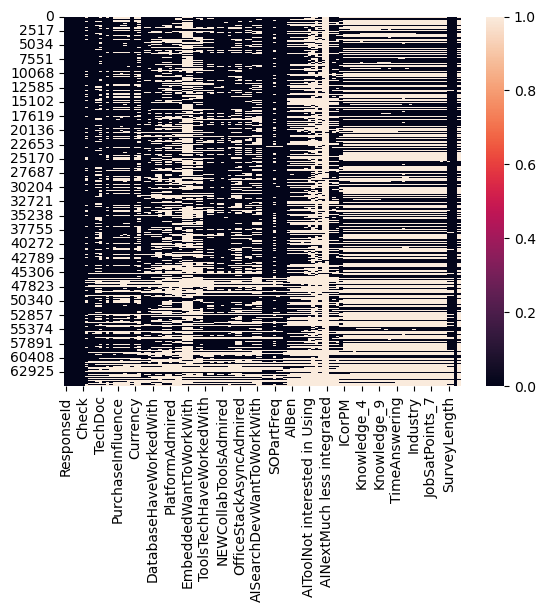

In [33]:
import seaborn as sns
sns.heatmap(data.isnull())

In [35]:
data['Employment'].isnull().sum()

0

In [37]:
data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86155.287263,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,86155.287263,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,86155.287263,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,86155.287263,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,86155.287263,NaN


In [39]:
data['CodingActivities'].isnull().sum()

10971

In [41]:
data['CodingActivities'] = data['CodingActivities'].fillna(value = data['CodingActivities'].mode()[0])

In [43]:
data['EdLevel'].isnull().sum()

4653

In [45]:
data['EdLevel'] = data['EdLevel'].fillna(value = data['EdLevel'].mode()[0])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['ConvertedCompYearly_Normalized'] = scaler.fit_transform(data[['ConvertedCompYearly']])

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['ConvertedCompYearly_Z_Normalized'] = scaler.fit_transform(data[['ConvertedCompYearly']])

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

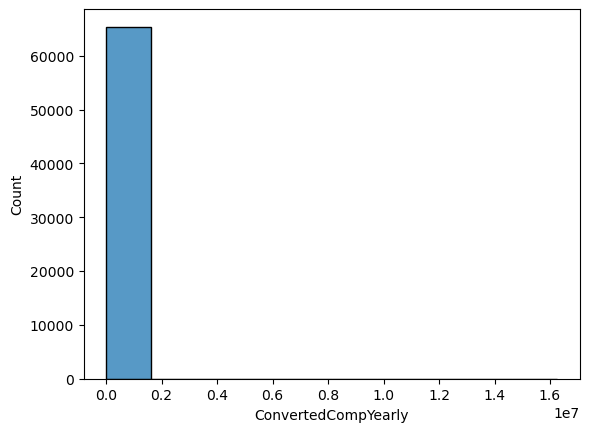

In [51]:
sns.histplot(data[data['ConvertedCompYearly'] != 86155.287263]['ConvertedCompYearly'], bins = 10)

In [53]:
data['ConvertedCompYearly'].value_counts()

ConvertedCompYearly
86155.287263     42002
64444.000000       321
53703.000000       308
75184.000000       230
85925.000000       226
                 ...  
46145.000000         1
154440.000000        1
27391.000000         1
11562.000000         1
116844.000000        1
Name: count, Length: 6114, dtype: int64

In [55]:
data[['ConvertedCompYearly']]

,ConvertedCompYearly
0,86155.287263
1,86155.287263
2,86155.287263
3,86155.287263
4,86155.287263
...,...
65432,86155.287263
65433,86155.287263
65434,86155.287263
65435,86155.287263


In [57]:
data['Country'].unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines',
       'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy',
       'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria',
       'Iran, Islamic Republic of...', 'France', 'Saudi Arabia',
       'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands',
       'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia',
       'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecu

In [59]:
data['Country'] = data['Country'].fillna(value = 'Unknown')

In [61]:
data['Country'].isnull().sum()

0

In [63]:
data['Employment'].unique()

array(['Employed, full-time', 'Student, full-time',
       'Student, full-time;Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Student, part-time;Employed, part-time', 'I prefer not to say',
       'Not employed, but looking for work', 'Student, part-time',
       'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Student, par

In [65]:
data.isnull().sum()

ResponseId                              0
MainBranch                              0
Age                                     0
Employment                              0
RemoteWork                              0
                                    ...  
SurveyEase                           9199
ConvertedCompYearly                     0
JobSat                              36311
ConvertedCompYearly_Normalized          0
ConvertedCompYearly_Z_Normalized        0
Length: 116, dtype: int64

In [67]:
data[['SurveyEase']]

,SurveyEase
0,NaN
1,NaN
2,Easy
3,Easy
4,Easy
...,...
65432,NaN
65433,NaN
65434,NaN
65435,NaN


In [69]:
data['SurveyEase'] = data['SurveyEase'].fillna(value = data['SurveyEase'].mode()[0])

In [71]:
data['SurveyEase'].isnull().sum()

0

In [73]:
data[['JobSat']]

,JobSat
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
65432,NaN
65433,NaN
65434,NaN
65435,NaN


In [75]:
data['JobSat'].unique()

array([nan,  8.,  5., 10.,  6.,  9.,  4.,  7.,  3.,  2.,  1.,  0.])

In [77]:
data['JobSat'] = data['JobSat'].fillna(value = data['JobSat'].mean().astype('int'))

In [79]:
data['JobSat'].isnull().sum()

0

In [81]:
data[['YearsCodePro']]

,YearsCodePro
0,NaN
1,17
2,27
3,NaN
4,NaN
...,...
65432,3
65433,NaN
65434,5
65435,2


In [83]:
data['YearsCodePro'].unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [85]:
data['YearsCodePro'].unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [87]:
data['JobSat'].unique()

array([ 6.,  8.,  5., 10.,  9.,  4.,  7.,  3.,  2.,  1.,  0.])

<Axes: xlabel='JobSat', ylabel='Count'>

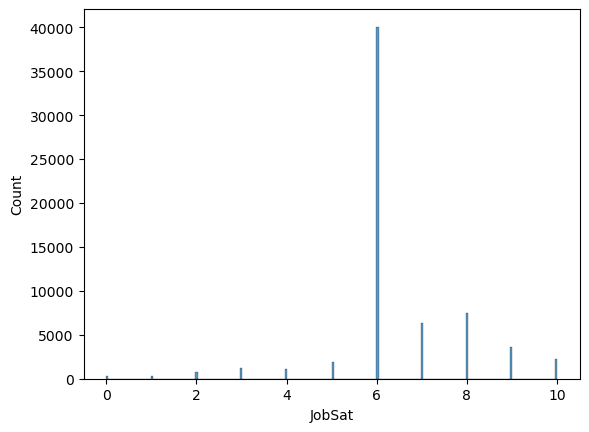

In [89]:
sns.histplot(data = data['JobSat'])

In [91]:
data['RemoteWork'].unique()

array(['Remote', 'Hybrid (some remote, some in-person)', 'In-person'],
      dtype=object)

In [93]:
df = data[data['RemoteWork'] == 'Remote']

In [95]:
df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                                                                             13193
Independent contractor, freelancer, or self-employed                                                                                                                                                             3230
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                         1861
Employed, part-time                                                                                                                                                                                               360
Not employed, but looking for work;Independent contractor, freelancer, or self-employed                                              

<Axes: >

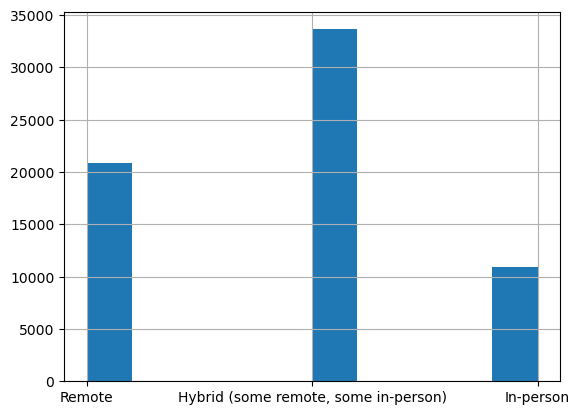

In [97]:
data['RemoteWork'].hist()

In [99]:
data['LanguageHaveWorkedWith']

0                                                      NaN
1        Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                       C#
3        C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4                  C++;HTML/CSS;JavaScript;Lua;Python;Rust
                               ...                        
65432                                                  NaN
65433                                                  NaN
65434                                                  NaN
65435             C;C++;Go;Lua;Objective-C;Python;Rust;SQL
65436     C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript
Name: LanguageHaveWorkedWith, Length: 65437, dtype: object

In [101]:
data[data['Country'] == 'Azerbaijan']['LanguageHaveWorkedWith'].mode()[0]

'HTML/CSS;JavaScript;Python'

In [103]:
df = data[data['Country'].isin(['Azerbaijan', 'Turkey', 'Mexico'])]

In [105]:
values = df['LanguageHaveWorkedWith'].value_counts().nlargest(5).index

In [107]:
df = df[df['LanguageHaveWorkedWith'].isin(values)]

<Axes: xlabel='Country', ylabel='LanguageHaveWorkedWith'>

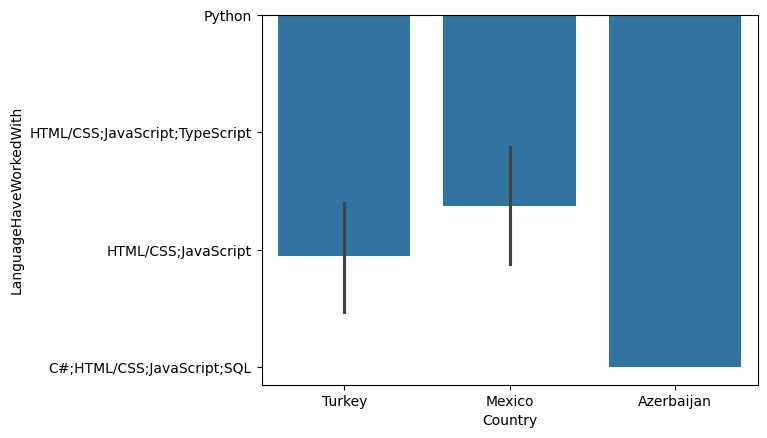

In [109]:
sns.barplot(data = df, x = 'Country', y = 'LanguageHaveWorkedWith')

<Axes: xlabel='YearsCodePro', ylabel='JobSatPoints_1'>

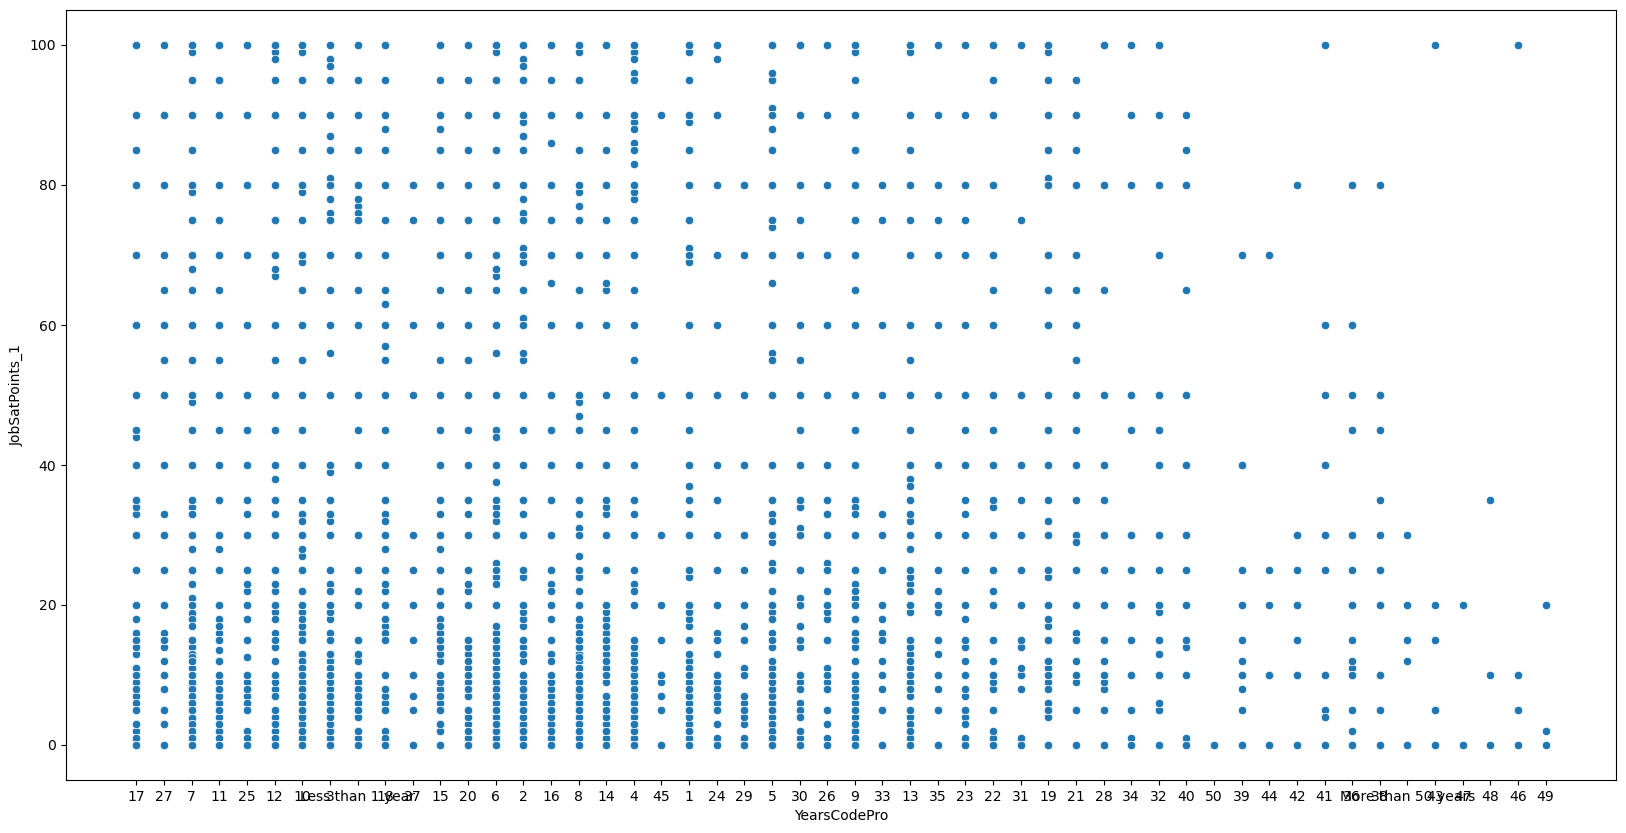

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
sns.scatterplot(x = data['YearsCodePro'], y = data['JobSatPoints_1'])

<Axes: xlabel='EdLevel', ylabel='Employment'>

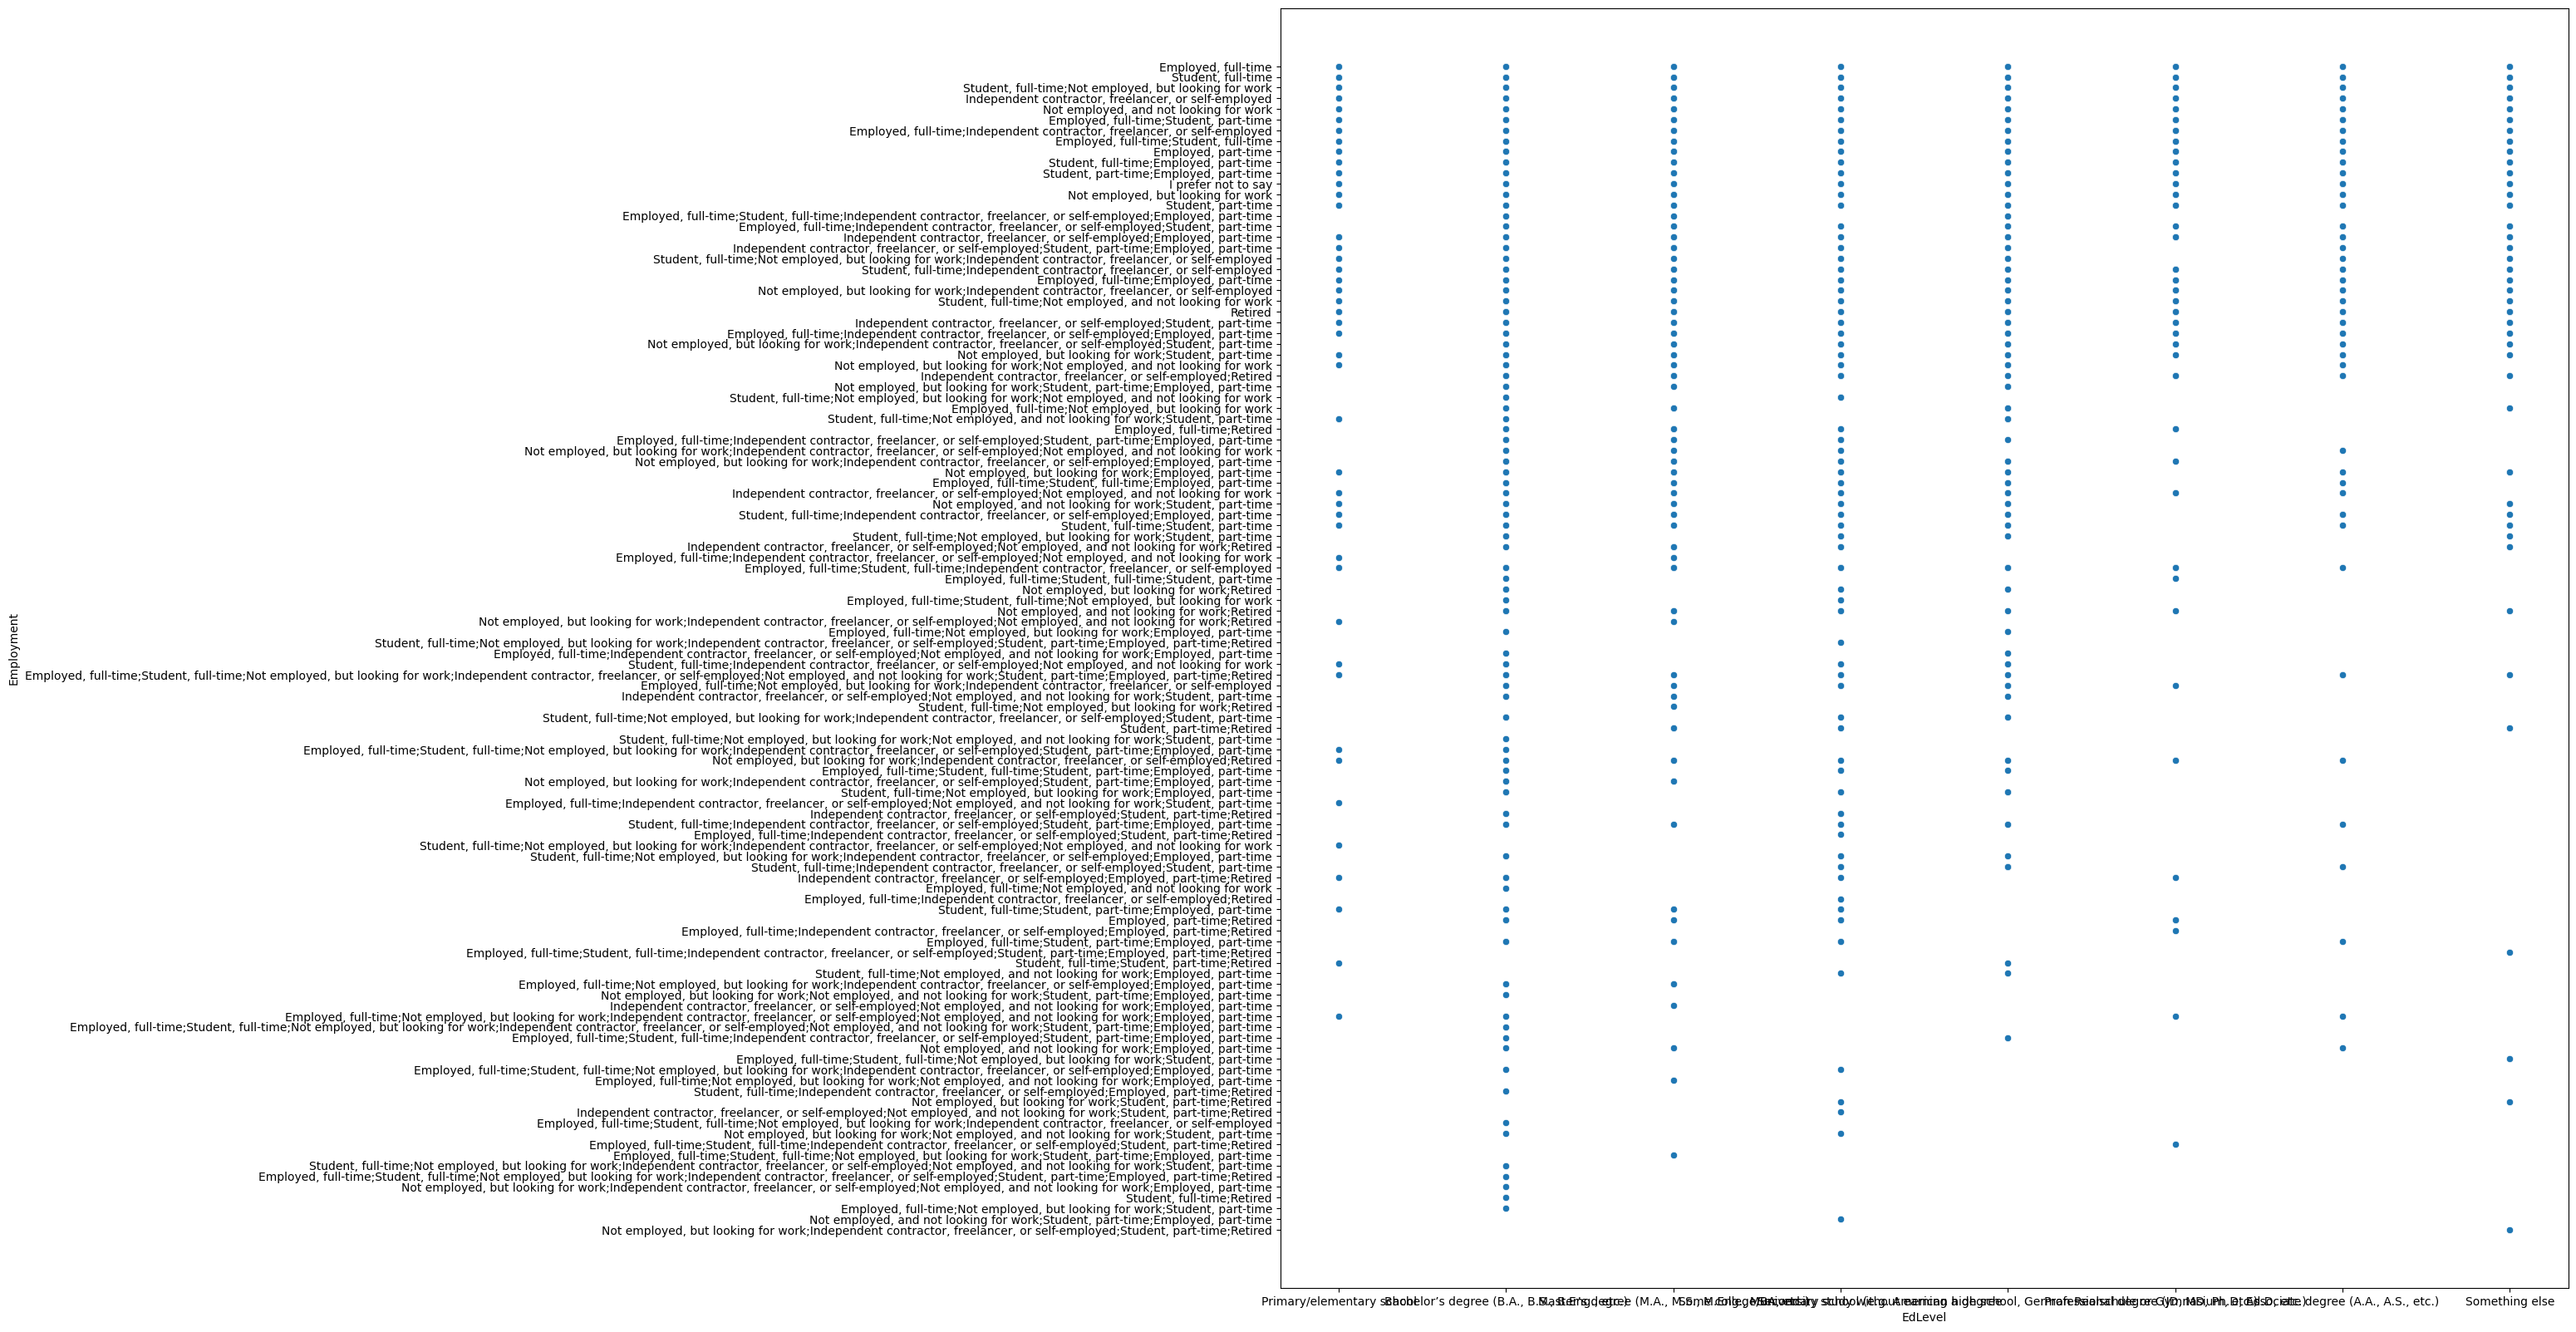

In [112]:
plt.figure(figsize = (20, 20))
sns.scatterplot(x = data['EdLevel'], y = data['Employment'])

In [114]:
data['JobSat'].unique()

array([ 6.,  8.,  5., 10.,  9.,  4.,  7.,  3.,  2.,  1.,  0.])

<Axes: >

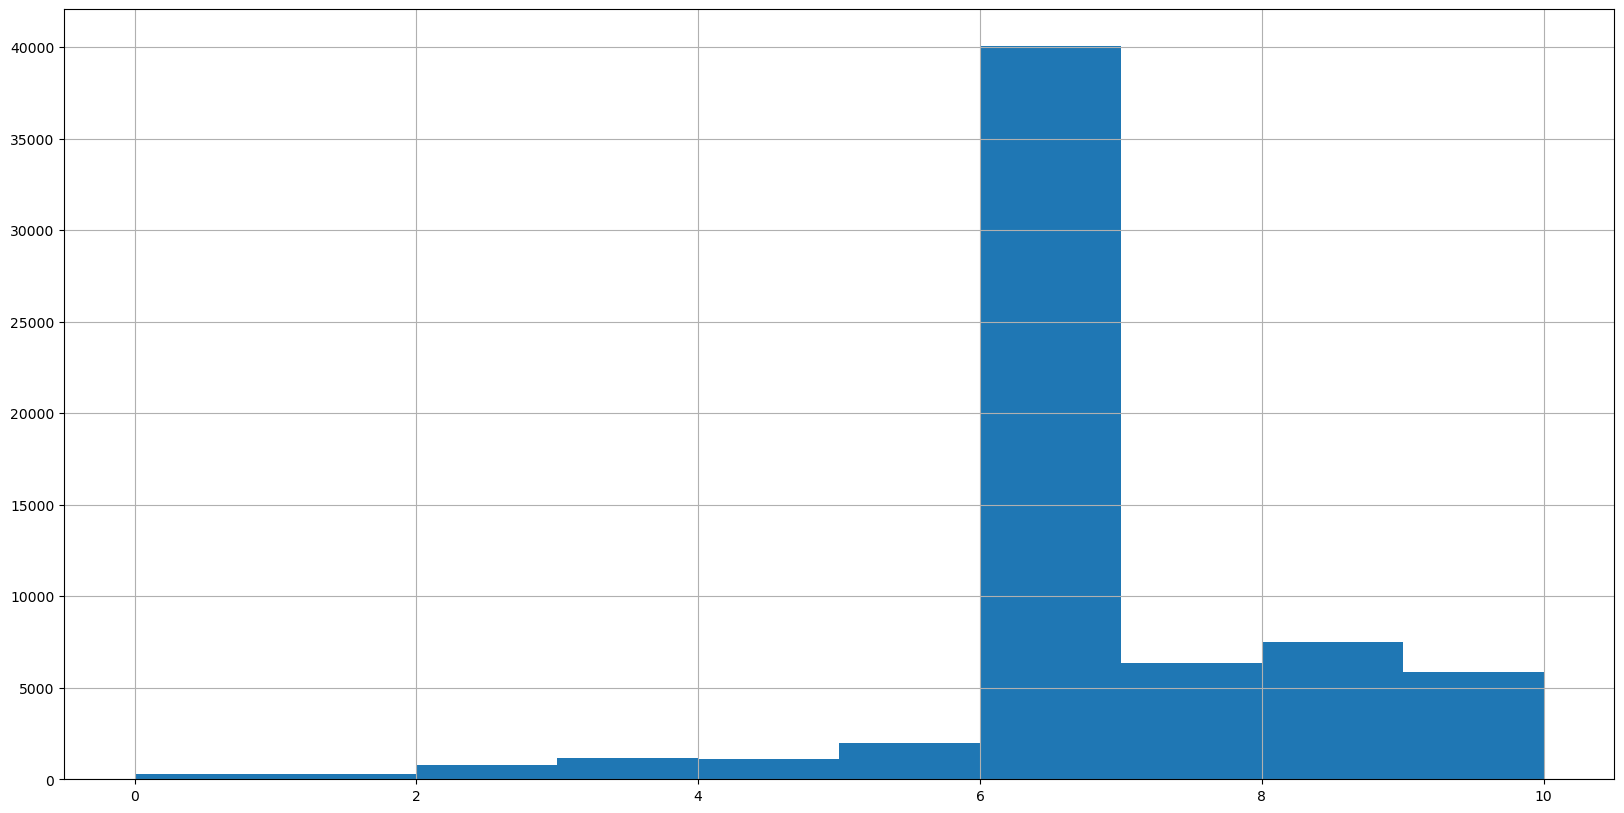

In [115]:
plt.figure(figsize = (20, 10))
data['JobSat'].hist()

In [123]:
data['LanguageHaveWorkedWith'] = data['LanguageHaveWorkedWith'].fillna(data['LanguageHaveWorkedWith'].mode()[0])

In [125]:
data['LanguageWantToWorkWith'] = data['LanguageWantToWorkWith'].fillna(data['LanguageWantToWorkWith'].mode()[0])

In [127]:
data['LanguageWantToWorkWith']

0                                                   Python
1        Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                       C#
3        HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...
4                       C++;HTML/CSS;JavaScript;Lua;Python
                               ...                        
65432                                               Python
65433                                               Python
65434                                               Python
65435                                             Rust;SQL
65436                         JavaScript;Python;TypeScript
Name: LanguageWantToWorkWith, Length: 65437, dtype: object

In [129]:
data['RemoteWork'].nunique()

3

In [131]:
data['Country'].unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines',
       'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy',
       'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria',
       'Iran, Islamic Republic of...', 'France', 'Saudi Arabia',
       'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands',
       'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia',
       'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecu

In [133]:
regions = ['Canada', 'Norway', 'Switzerland', 'Uzbekistan']

In [135]:
df = data[data['Country'].isin(regions)]

In [137]:
df['Country'].unique()

array(['Canada', 'Norway', 'Uzbekistan', 'Switzerland'], dtype=object)

<Axes: xlabel='Country', ylabel='Count'>

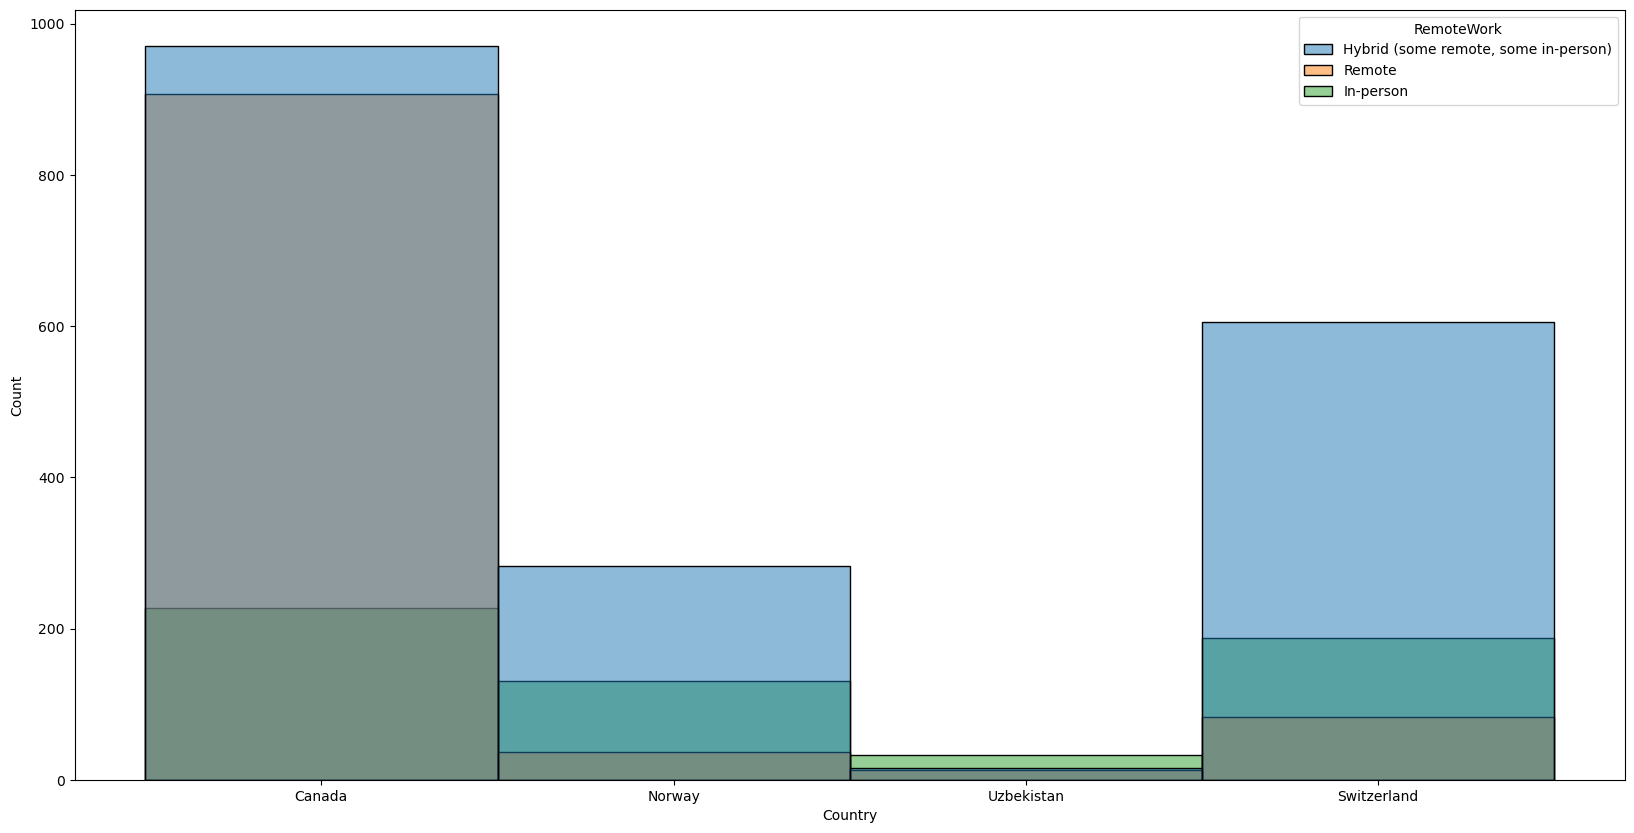

In [139]:
plt.figure(figsize = (20, 10))
sns.histplot(data = df, x = 'Country', hue = 'RemoteWork')

In [141]:
data['JobSat']

0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
65432    6.0
65433    6.0
65434    6.0
65435    6.0
65436    6.0
Name: JobSat, Length: 65437, dtype: float64

In [143]:
data['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [145]:
cross_tabular = pd.crosstab(data['Employment'], data['EdLevel'])

In [147]:
cross_tabular

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
Employment,,,,,,,,
"Employed, full-time",1059,19322,11011,160,2073,1460,3579,377
"Employed, full-time;Employed, part-time",9,106,61,1,8,9,15,3
"Employed, full-time;Independent contractor, freelancer, or self-employed",104,1592,963,25,159,181,492,41
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",11,95,45,1,10,6,14,2
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
"Student, full-time;Student, part-time;Employed, part-time",0,1,1,1,0,0,4,0
"Student, full-time;Student, part-time;Retired",0,0,0,1,0,1,0,0
"Student, part-time",12,171,26,48,5,140,75,17


In [149]:
data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_Normalized,ConvertedCompYearly_Z_Normalized
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,Easy,86155.287263,6.0,1.302062e-16,0.0053
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,NaN,Easy,86155.287263,6.0,1.302062e-16,0.0053
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,86155.287263,6.0,1.302062e-16,0.0053
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,Too long,Easy,86155.287263,6.0,1.302062e-16,0.0053
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,Too short,Easy,86155.287263,6.0,1.302062e-16,0.0053


In [151]:
data['Industry'].unique()

array([nan, 'Healthcare', 'Software Development',
       'Banking/Financial Services', 'Other:',
       'Media & Advertising Services', 'Insurance',
       'Internet, Telecomm or Information Services', 'Higher Education',
       'Energy', 'Fintech', 'Retail and Consumer Services',
       'Manufacturing', 'Government',
       'Computer Systems Design and Services',
       'Transportation, or Supply Chain'], dtype=object)

In [153]:
data['Industry'] = data['Industry'].fillna(value = data['Industry'].mode()[0])

In [155]:
data['Industry'].isnull().sum()

0

<Axes: >

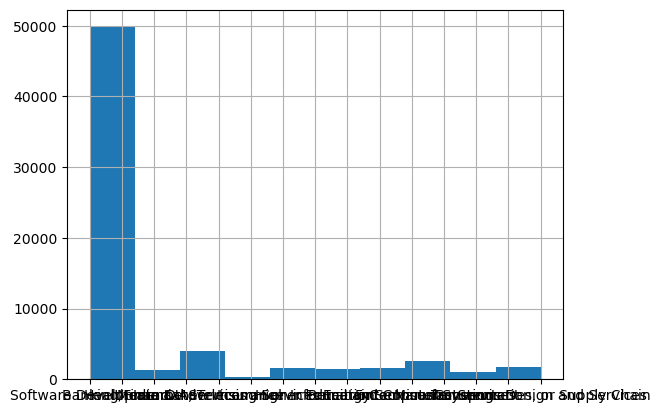

In [157]:
data['Industry'].hist()

In [159]:
data['ConvertedCompYearly'].unique()

array([ 86155.28726264,   7322.        ,  30074.        , ...,
        15637.        ,   9711.        , 116844.        ])

In [161]:
data['ConvertedCompYearly'].mean()

86155.28726264133

In [163]:
data['ConvertedCompYearly'].max()

16256603.0

In [165]:
data['ConvertedCompYearly'].std()

111761.35725234024

In [167]:
data[data['ConvertedCompYearly'] > 3*data['ConvertedCompYearly'].std() + data['ConvertedCompYearly'].mean()]

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_Normalized,ConvertedCompYearly_Z_Normalized
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,0.0,30.0,10.0,0.0,Appropriate in length,Easy,650000.0,6.0,5.045116,0.039984
594,595,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,20.0,20.0,5.0,0.0,Appropriate in length,Easy,432000.0,8.0,3.094516,0.026574
828,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,5.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,1000000.0,8.0,8.176813,0.061513
920,921,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,25.0,30.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,500000.0,7.0,3.702960,0.030757
1081,1082,I am a developer by profession,55-64 years old,"Employed, full-time;Independent contractor, fr...",Remote,Apples,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;How-to ...,...,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,500000.0,6.0,3.702960,0.030757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40188,40189,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,429429.0,6.0,3.071512,0.026416
40288,40289,I am a developer by profession,18-24 years old,"Employed, full-time;Student, part-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Books;Written Tutorial...,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,438767.0,6.0,3.155066,0.026990
40373,40374,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Apples,Bootstrapping a business;Freelance/contract work,"Secondary school (e.g. American high school, G...",Colleague;On the job training;Other online res...,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,Too long,Easy,644437.0,6.0,4.995340,0.039641
40952,40953,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby,Some college/university study without earning ...,Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,750000.0,6.0,5.939887,0.046135


In [169]:
data[data['Employment'] == 'Employed, full-time']['ConvertedCompYearly'].median()

86155.28726264134

<Axes: xlabel='Country', ylabel='ConvertedCompYearly'>

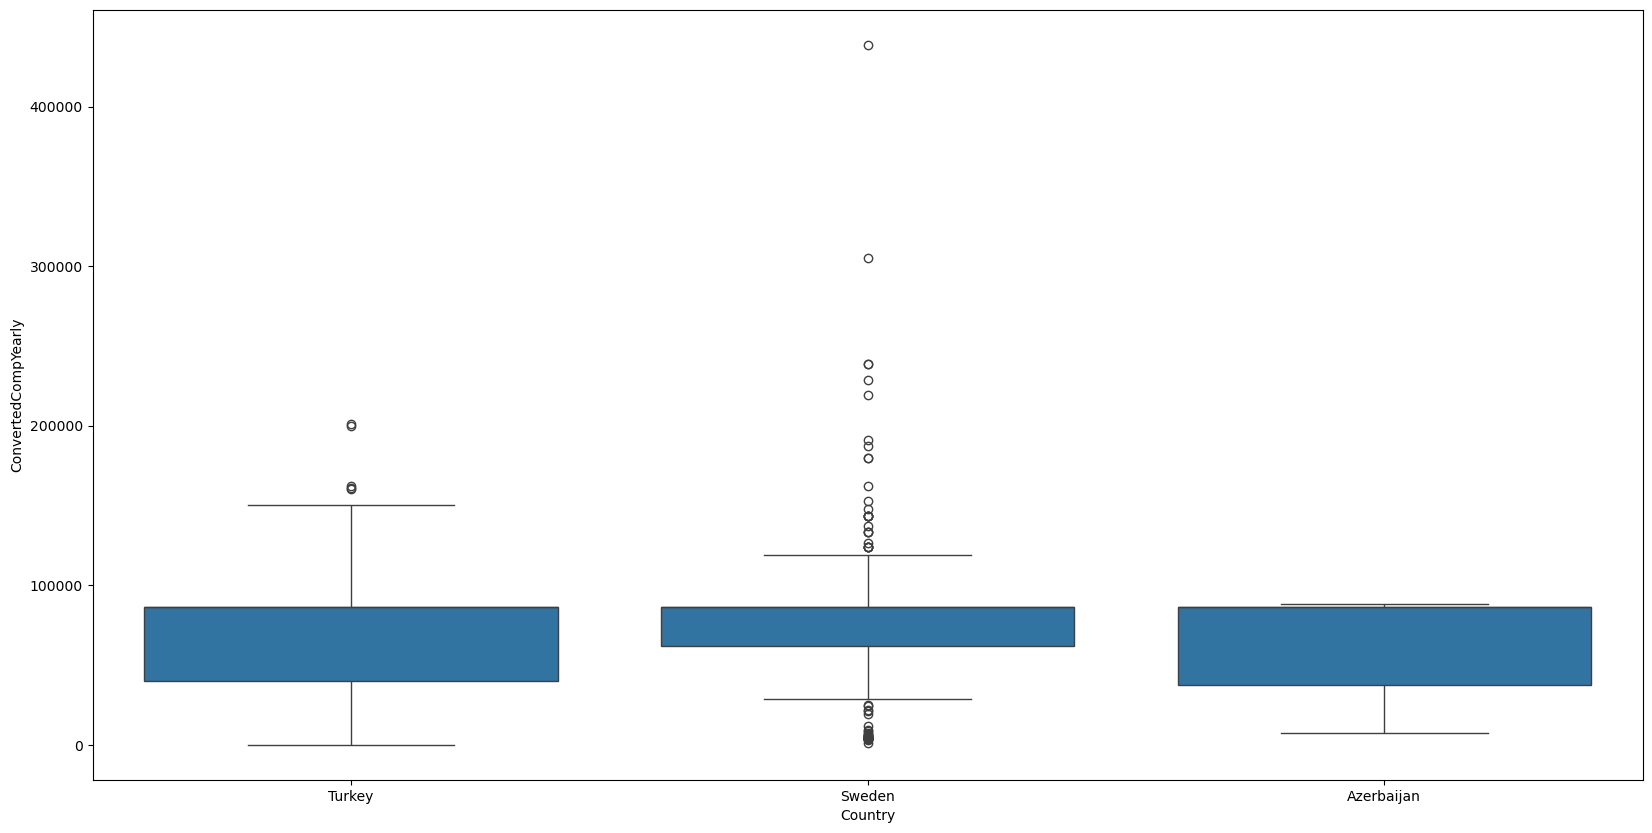

In [171]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = data[data['Country'].isin(['Azerbaijan', 'Turkey', 'Sweden'])], x = 'Country', y = 'ConvertedCompYearly')

In [173]:
corr_matrix = data[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].corr()

<Axes: >

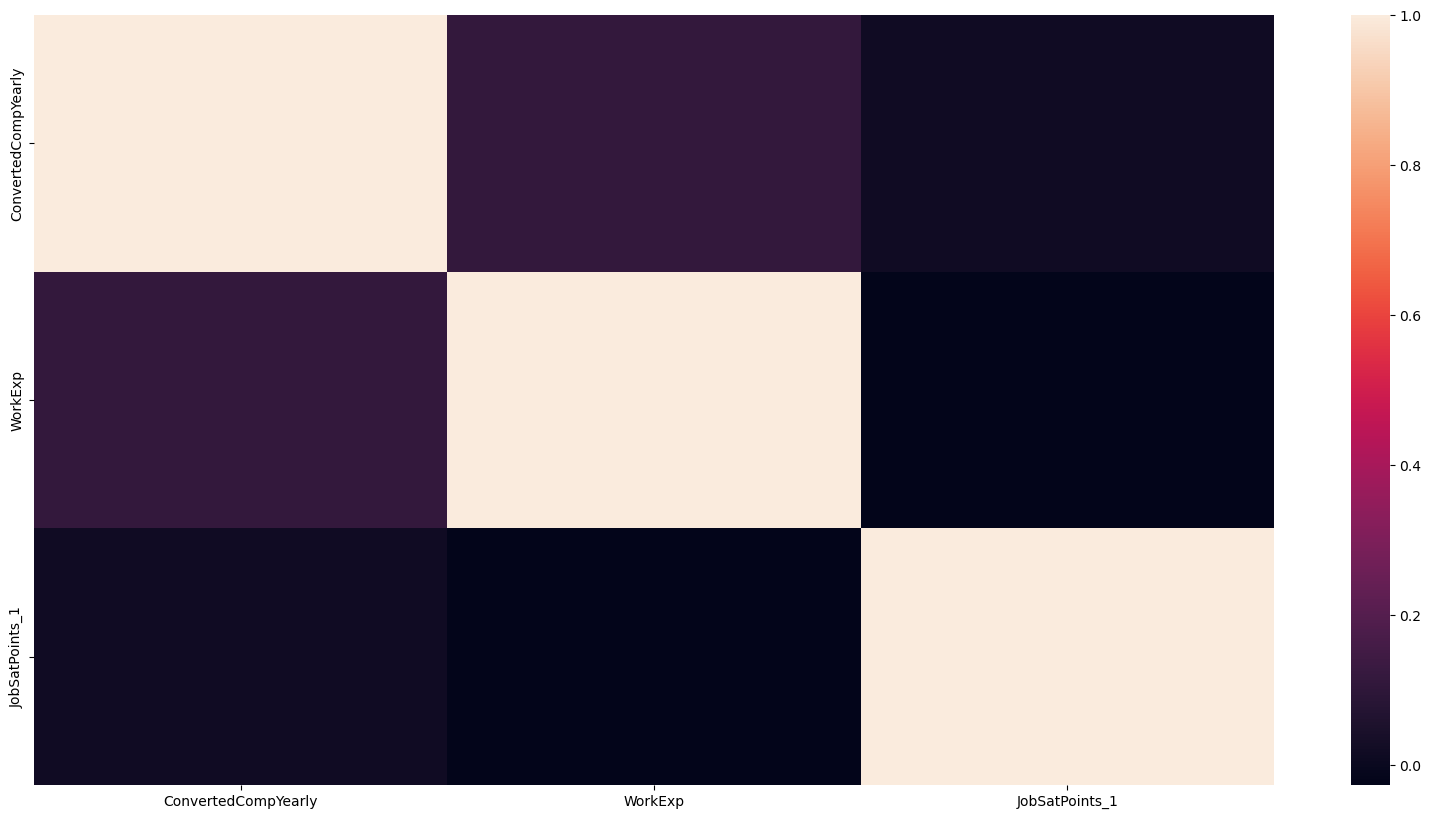

In [175]:
plt.figure(figsize = (20, 10))
sns.heatmap(corr_matrix)

<Axes: xlabel='ConvertedCompYearly', ylabel='WorkExp'>

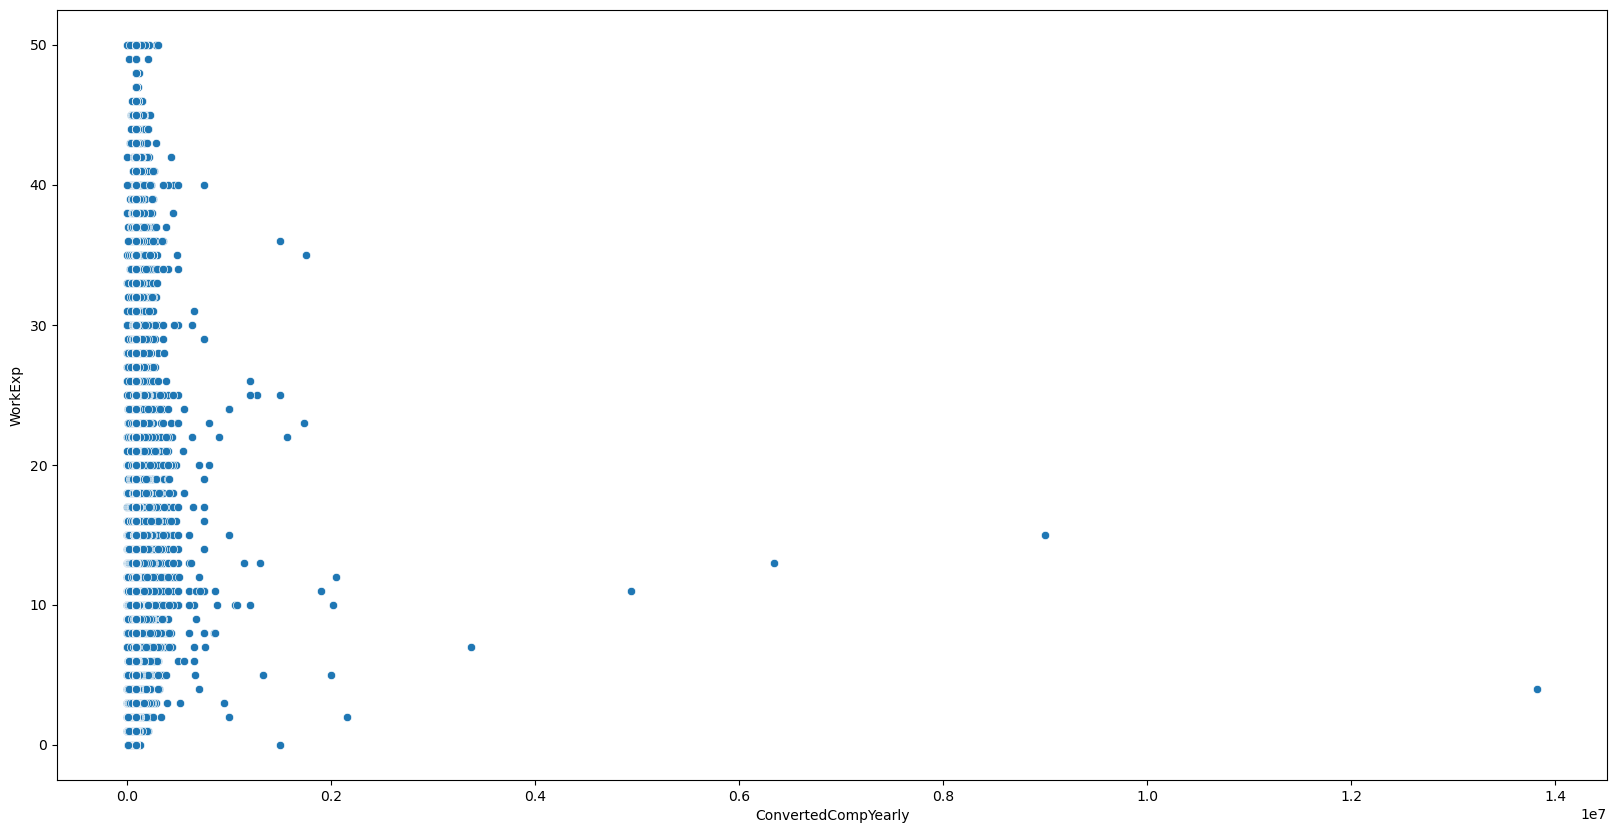

In [177]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data = data, x = 'ConvertedCompYearly', y = 'WorkExp')

In [178]:
data['ConvertedCompYearly'].median()

86155.28726264134

In [181]:
data['CompTotal'].unique()

array([     nan, 2040000.,   28000., ...,  254600.,  247433.,   77700.])

In [185]:
data['CompTotal'] = data['CompTotal'].fillna(value = data['CompTotal'].mean())

In [187]:
data['CompTotal'] = data['CompTotal'].astype('int')

In [189]:
data['CompTotal'].isnull().sum()

0

<Axes: >

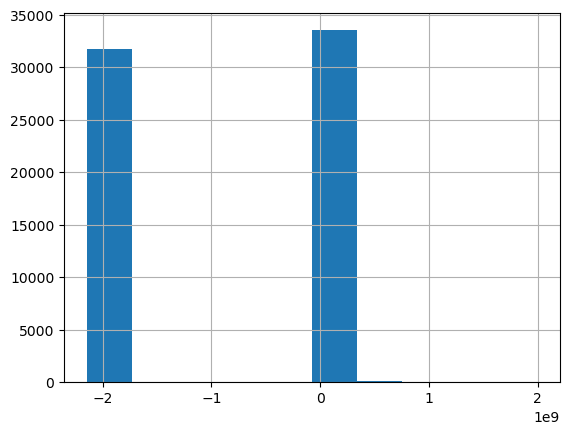

In [191]:
data['CompTotal'].hist()

<Axes: ylabel='Age'>

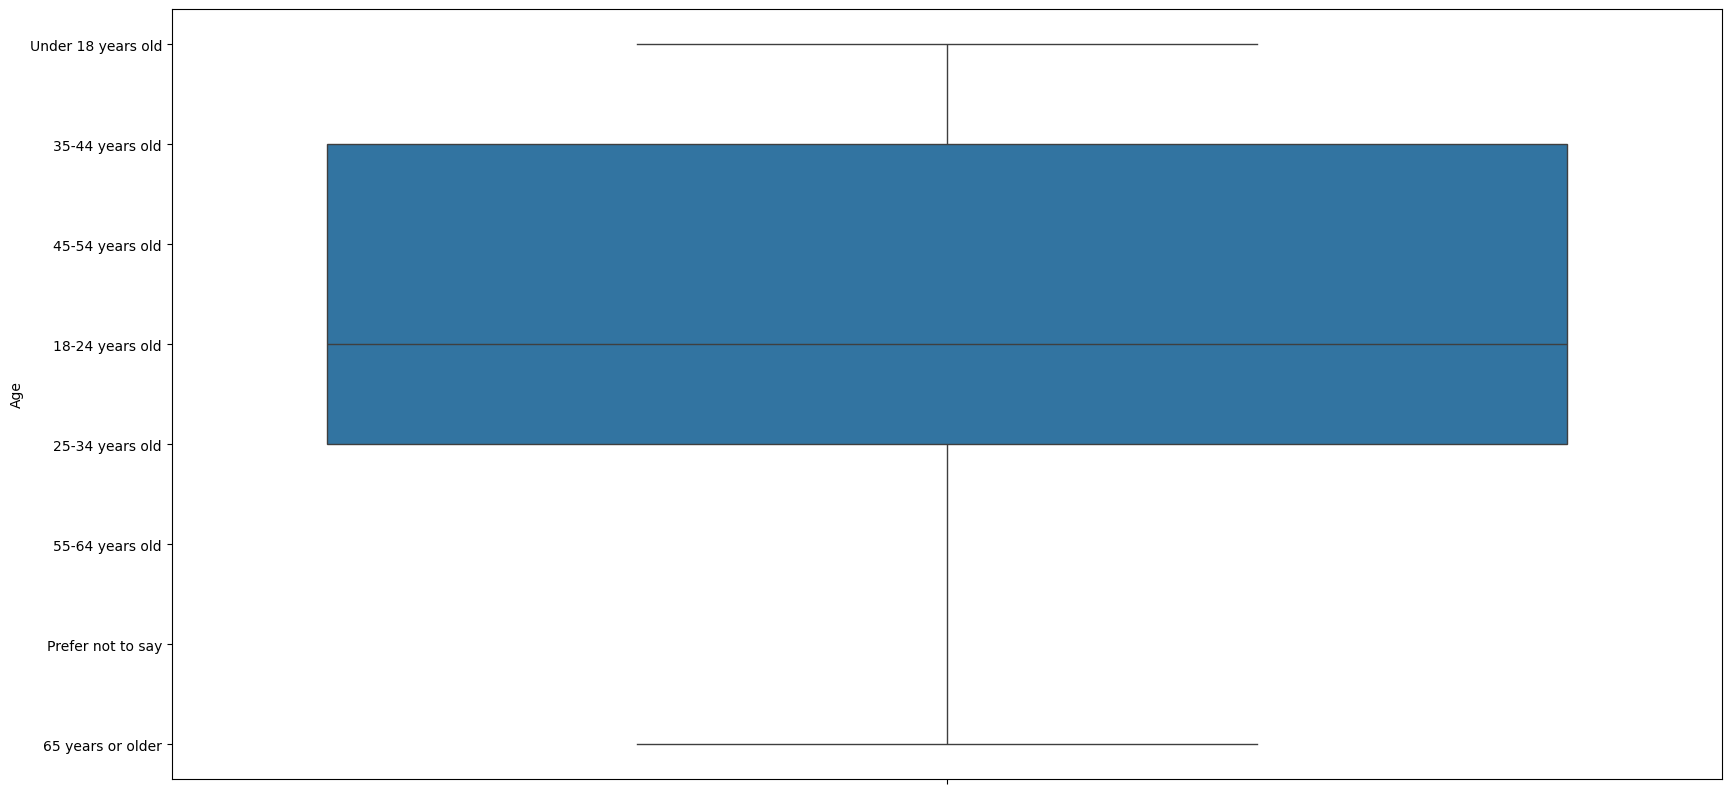

In [193]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = data['Age'])

<Axes: xlabel='Age', ylabel='WorkExp'>

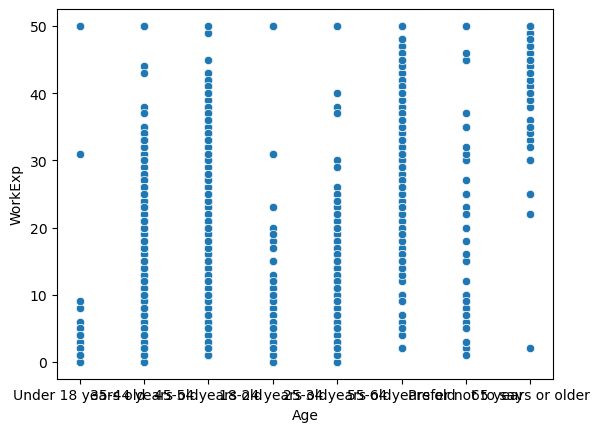

In [195]:
sns.scatterplot(data = data, x = 'Age', y = 'WorkExp')

In [196]:
a = data['DatabaseWantToWorkWith'].value_counts().head(5)

In [197]:
for i in a.index:
    print(i)

PostgreSQL
PostgreSQL;SQLite
SQLite
Microsoft SQL Server
MySQL


Text(0.5, 1.0, 'Desired Programming Languages')

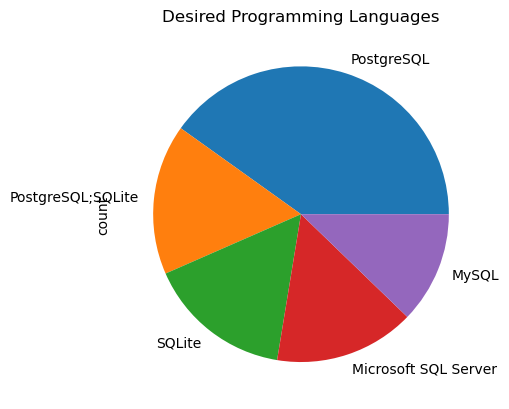

In [201]:
a.plot(kind = 'pie')
plt.title('Desired Programming Languages')

In [203]:
data['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [205]:
df = data[data['Age'] == '35-44 years old']

In [207]:
ct = pd.crosstab(data['TimeSearching'], data['TimeAnswering'])

<Axes: xlabel='TimeSearching'>

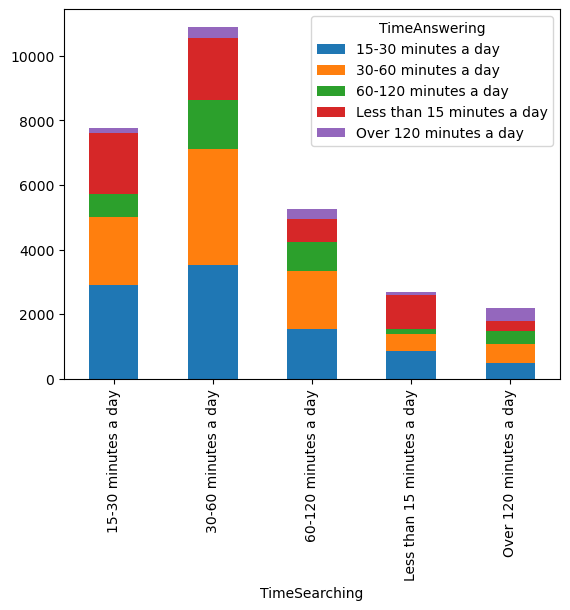

In [209]:
ct.plot(kind = 'bar', stacked = True)

<Axes: xlabel='Age', ylabel='CompTotal'>

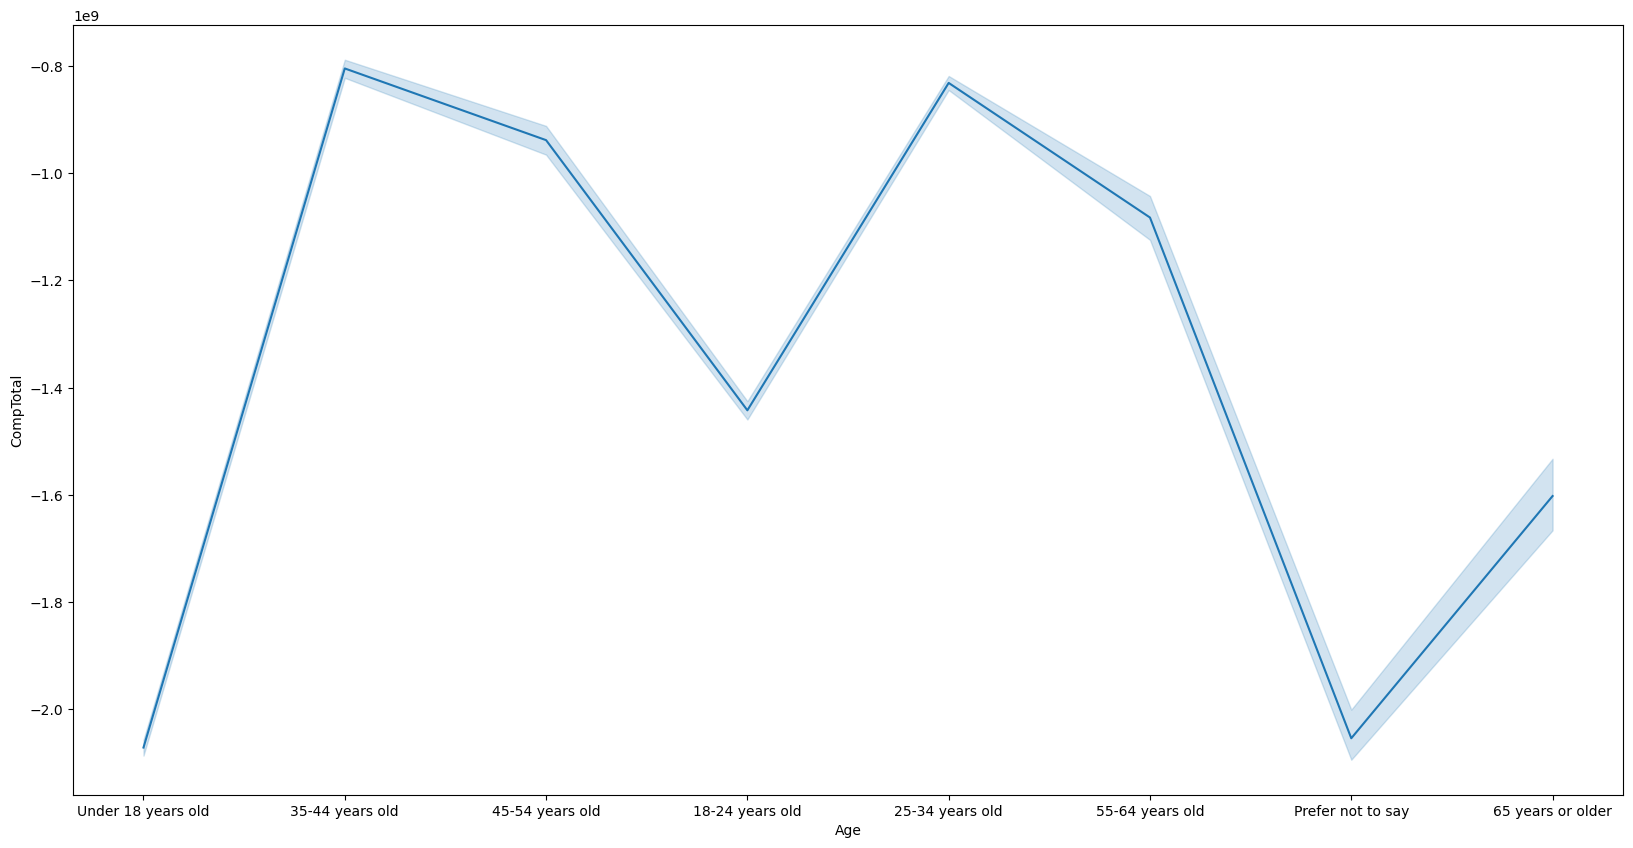

In [211]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = data, x = 'Age', y = 'CompTotal')

In [212]:
df = data.groupby('Age')['CompTotal'].mean()

In [213]:
df

Age
18-24 years old      -1.442290e+09
25-34 years old      -8.315337e+08
35-44 years old      -8.045360e+08
45-54 years old      -9.382894e+08
55-64 years old      -1.082636e+09
65 years or older    -1.602215e+09
Prefer not to say    -2.054108e+09
Under 18 years old   -2.071413e+09
Name: CompTotal, dtype: float64

<Axes: xlabel='Age'>

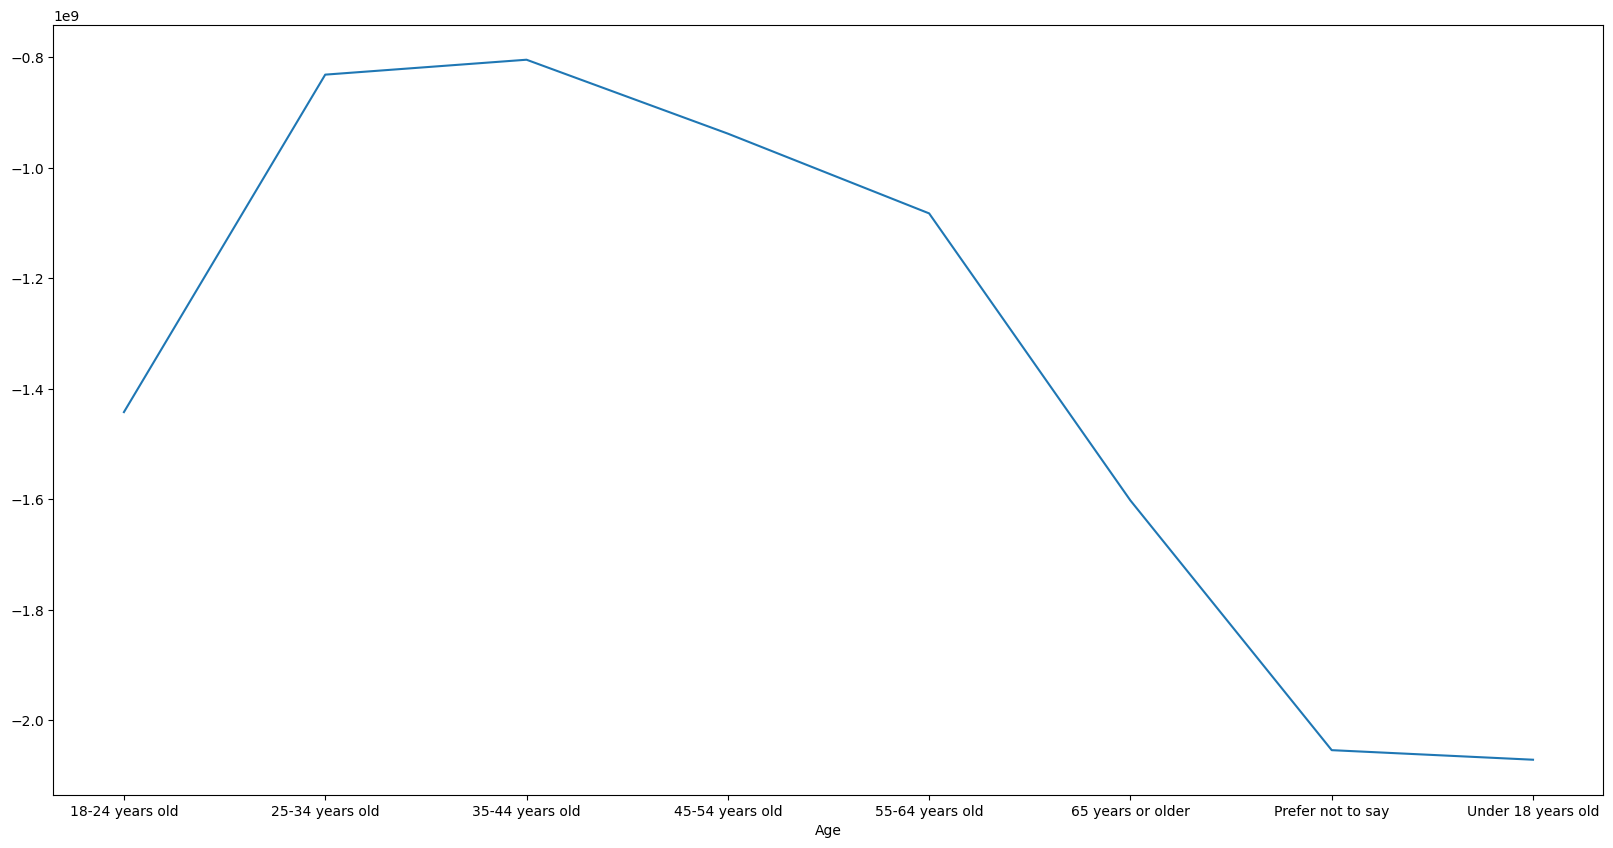

In [214]:
plt.figure(figsize = (20, 10))
df.plot(kind = 'line')

In [218]:
data['MainBranch']

0        I am a developer by profession
1        I am a developer by profession
2        I am a developer by profession
3                 I am learning to code
4        I am a developer by profession
                      ...              
65432    I am a developer by profession
65433    I am a developer by profession
65434    I am a developer by profession
65435    I am a developer by profession
65436       I code primarily as a hobby
Name: MainBranch, Length: 65437, dtype: object

<Axes: >

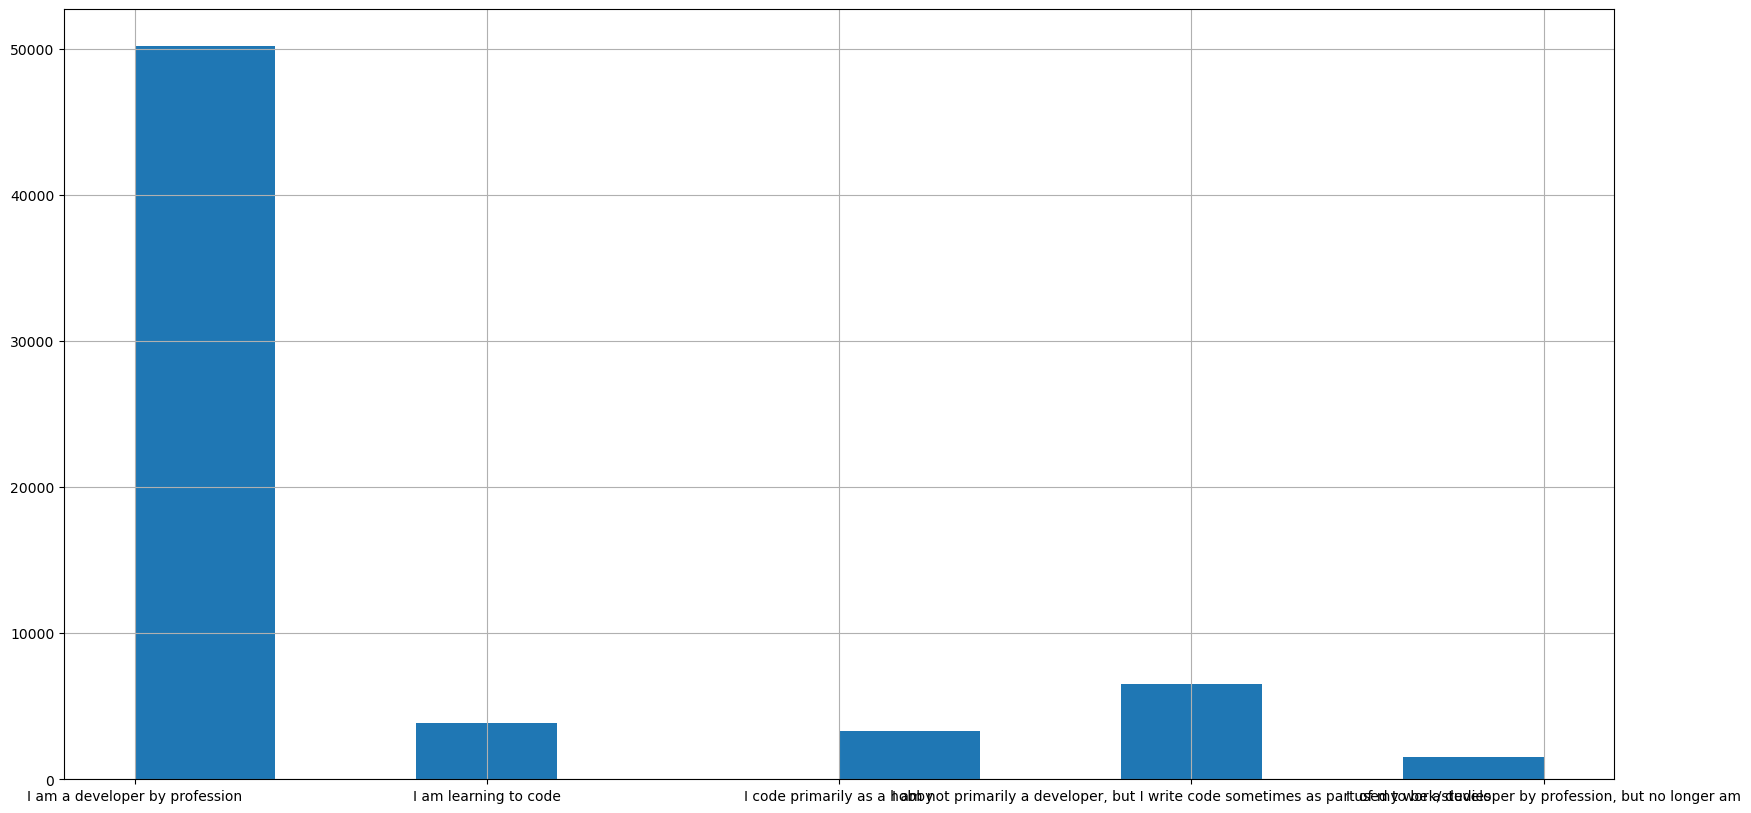

In [221]:
plt.figure(figsize =(20, 10))
data['MainBranch'].hist()

<Axes: ylabel='CompTotal'>

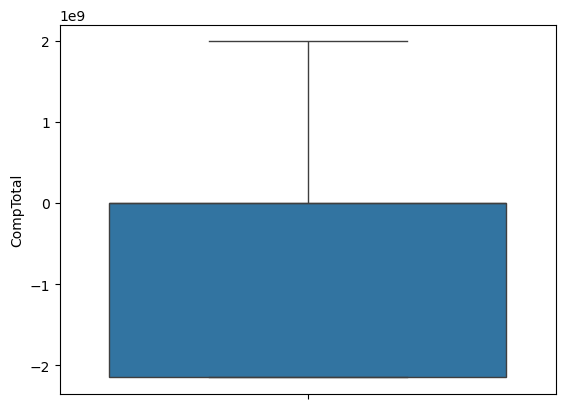

In [223]:
sns.boxplot(data = data, y = 'CompTotal')

<Axes: ylabel='CompTotal'>

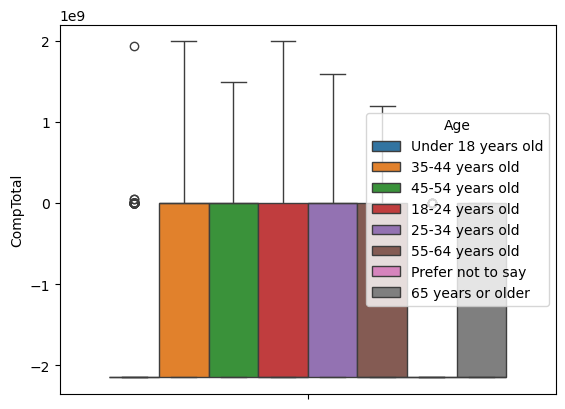

In [225]:
sns.boxplot(data = data, y = 'CompTotal', hue = 'Age')

In [227]:
df = data.select_dtypes(include = ['int64'])

In [229]:
df

,ResponseId
0,1
1,2
2,3
3,4
4,5
...,...
65432,65433
65433,65434
65434,65435
65435,65436


In [231]:
data['DatabaseWantToWorkWith'] = data['DatabaseWantToWorkWith'].fillna(value = data['DatabaseWantToWorkWith'].mode()[0])

In [233]:
data['DatabaseWantToWorkWith']

0                        PostgreSQL
1                        PostgreSQL
2        Firebase Realtime Database
3          MongoDB;MySQL;PostgreSQL
4                 PostgreSQL;SQLite
                    ...            
65432                    PostgreSQL
65433                    PostgreSQL
65434                    PostgreSQL
65435             PostgreSQL;SQLite
65436      MongoDB;MySQL;PostgreSQL
Name: DatabaseWantToWorkWith, Length: 65437, dtype: object

In [235]:
df = data['DatabaseWantToWorkWith'].value_counts().head(5)

In [237]:
df

DatabaseWantToWorkWith
PostgreSQL              26617
PostgreSQL;SQLite        1533
SQLite                   1476
Microsoft SQL Server     1431
MySQL                    1139
Name: count, dtype: int64

Text(0.5, 1.0, 'Desired Databases')

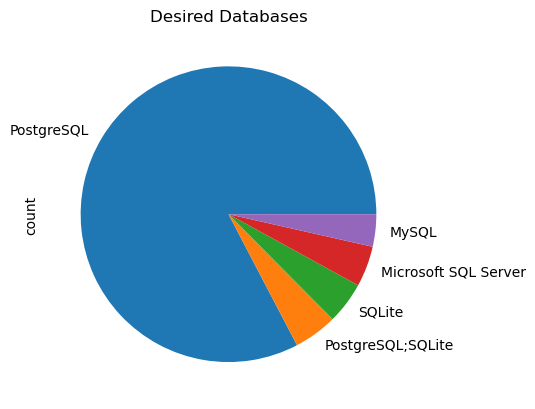

In [239]:
df.plot(kind = 'pie')
plt.title('Desired Databases')

In [240]:
data['DevType']

0                          NaN
1        Developer, full-stack
2         Developer Experience
3        Developer, full-stack
4        Developer, full-stack
                 ...          
65432               Blockchain
65433                      NaN
65434        Developer, mobile
65435      Developer, back-end
65436                      NaN
Name: DevType, Length: 65437, dtype: object

In [243]:
data['DevType'].fillna(value = data['DevType'].mode()[0], inplace = True)

In [245]:
data['DevType']

0        Developer, full-stack
1        Developer, full-stack
2         Developer Experience
3        Developer, full-stack
4        Developer, full-stack
                 ...          
65432               Blockchain
65433    Developer, full-stack
65434        Developer, mobile
65435      Developer, back-end
65436    Developer, full-stack
Name: DevType, Length: 65437, dtype: object

In [247]:
df = data['DevType'].value_counts().head(5)

<Axes: ylabel='count'>

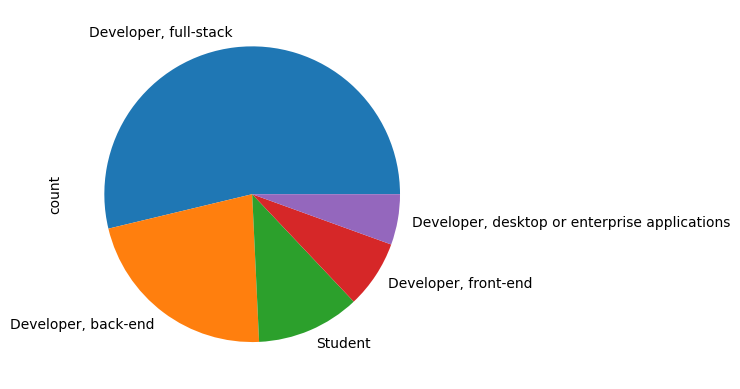

In [249]:
df.plot(kind = 'pie')

In [251]:
data['LanguageHaveWorkedWith']

0                           HTML/CSS;JavaScript;TypeScript
1        Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                       C#
3        C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4                  C++;HTML/CSS;JavaScript;Lua;Python;Rust
                               ...                        
65432                       HTML/CSS;JavaScript;TypeScript
65433                       HTML/CSS;JavaScript;TypeScript
65434                       HTML/CSS;JavaScript;TypeScript
65435             C;C++;Go;Lua;Objective-C;Python;Rust;SQL
65436     C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript
Name: LanguageHaveWorkedWith, Length: 65437, dtype: object

In [253]:
df = data['LanguageHaveWorkedWith'].value_counts().head(5)

<Axes: ylabel='count'>

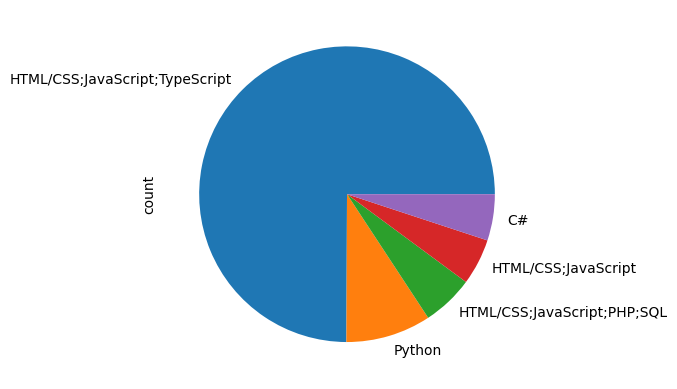

In [255]:
df.plot(kind = 'pie')

In [257]:
data['LanguageAdmired']

0                                                      NaN
1        Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                       C#
3        HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...
4                       C++;HTML/CSS;JavaScript;Lua;Python
                               ...                        
65432                                                  NaN
65433                                                  NaN
65434                                                  NaN
65435                                             Rust;SQL
65436                         JavaScript;Python;TypeScript
Name: LanguageAdmired, Length: 65437, dtype: object

In [259]:
data['LanguageAdmired'].fillna(value = data['LanguageAdmired'].mode()[0], inplace = True)

In [261]:
df = data['LanguageAdmired'].value_counts().head(5)

<Axes: ylabel='count'>

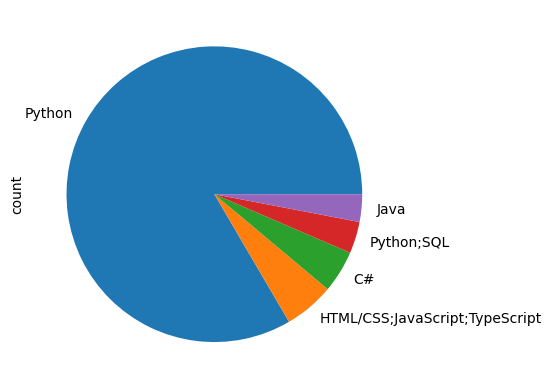

In [263]:
df.plot(kind = 'pie')

In [265]:
data['JobSatPoints_6'] = data['JobSatPoints_6'].fillna(value = data['JobSatPoints_6'].mean())

In [267]:
data['JobSatPoints_6'] = data['JobSatPoints_6'].astype('int')

In [269]:
data['JobSatPoints_6'].unique()

array([ 24,   0,  25,  30,  60, 100,  20,  50,  15,  10,   5,  80,   8,
        65,  90,  75,  35,  40,  33,  70,  17,   7,  12,  13,   9,  21,
        18,  95,   2,  45,  34,  16,  78,  85,   1,  14,  31,  11,  23,
        28,  81,   6,  55,   3,  22,  42,   4,  89,  99,  36,  27,  19,
        87,  88,  29,  37,  39,  77,  68,  26,  98,  32,  66,  57,  82,
        94,  61,  43,  69,  76,  73,  46,  49,  52,  97,  96,  67,  91,
        86,  56,  41,  74,  51,  48,  44,  64,  54,  63])

In [271]:
data['JobSatPoints_7'] = data['JobSatPoints_7'].fillna(value = data['JobSatPoints_7'].mean())

In [273]:
data['JobSatPoints_7'] = data['JobSatPoints_7'].astype('int')

In [275]:
data['JobSatPoints_7'].unique()

array([ 22,   0,  10,  90,  20,  50,  15,   5,  60,  30, 100,   7,  25,
        70,  65,  80,  33,  40,  35,  27,  23,  14,  12,   9,   8,  18,
        37,  75,   1,  11,  29,  17,   4,  21,  54,  13,  26,  45,  19,
         6,  99,   3,  16,  85,  24,  55,  89,  98,  34,  95,  28,   2,
        88,  56,  32,  68,  77,  39,  61,  92,  78,  44,  94,  73,  97,
        87,  81,  31,  91,  93,  49,  96,  83,  69,  48,  46,  82,  42,
        51,  72,  86,  38,  67,  36])

In [277]:
data['JobSatPoints_6'].unique()

array([ 24,   0,  25,  30,  60, 100,  20,  50,  15,  10,   5,  80,   8,
        65,  90,  75,  35,  40,  33,  70,  17,   7,  12,  13,   9,  21,
        18,  95,   2,  45,  34,  16,  78,  85,   1,  14,  31,  11,  23,
        28,  81,   6,  55,   3,  22,  42,   4,  89,  99,  36,  27,  19,
        87,  88,  29,  37,  39,  77,  68,  26,  98,  32,  66,  57,  82,
        94,  61,  43,  69,  76,  73,  46,  49,  52,  97,  96,  67,  91,
        86,  56,  41,  74,  51,  48,  44,  64,  54,  63])

In [279]:
data.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'ConvertedCompYearly_Normalized',
       'ConvertedCompYearly_Z_Normalized'],
      dtype='object', length=116)

In [281]:
data['JobSatPoints_5'] = data['JobSatPoints_5'].fillna(value = data['JobSatPoints_5'].mean())

In [283]:
data['JobSatPoints_5'] = data['JobSatPoints_5'].astype('int')

In [285]:
data['JobSatPoints_5'].unique()

array([ 10,   0,  30, 100,   5,  20,   7,  75,  15,  90,  60,  99,  70,
        50,   3,  16,  25,  12,   9,   4,  57,  80,   8,   1,   2,  65,
        19,  74,  40,  11,   6,  35,  14,  85,  18,  95,  89,  21,  13,
        33,  66,  98,  32,  55,  22,  56,  73,  39,  78,  63,  96,  34,
        86,  45,  77,  69,  44,  23,  68,  88,  67,  76,  64,  97,  91,
        17,  87,  26,  27,  24,  36,  84])

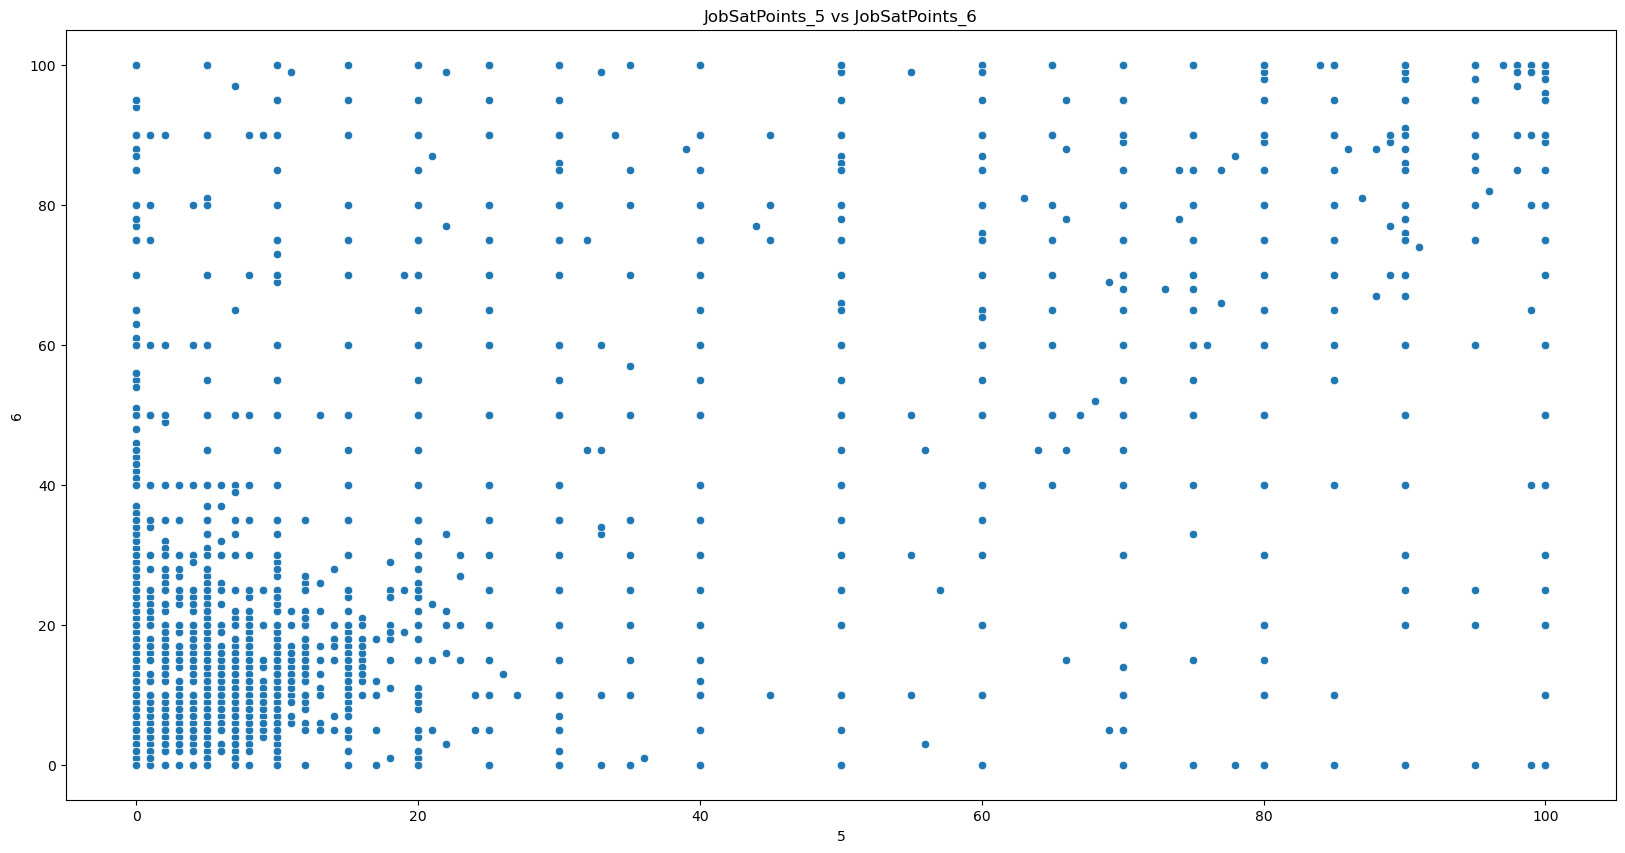

In [287]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data = data, x = 'JobSatPoints_5', y = 'JobSatPoints_6')
plt.title('JobSatPoints_5 vs JobSatPoints_6')
plt.xlabel('5')
plt.ylabel('6')
plt.show()

In [289]:
data['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [295]:
data.replace({'Age':{'Under 18 years old':'<18'}}, inplace = True)

In [297]:
data.replace({'Age':{'35-44 years old':'35-44', '45-54 years old':'45-54', '18-24 years old':'18-24', '25-34 years old':'25-34', '55-64 years old':'55-64', '65 years or older':'>65'}}, inplace = True)

In [301]:
data['Age'] = data['Age'].replace(to_replace = 'Prefer not to say', value = data['Age'].mode()[0])

In [303]:
data['Age'].unique()

array(['<18', '35-44', '45-54', '18-24', '25-34', '55-64', '>65'],
      dtype=object)

In [305]:
id_vars = data.columns.difference(['JobSatPoints_5', 'JobSatPoints_6']).tolist()

In [307]:
data_melted = data.melt(id_vars = id_vars)

In [309]:
data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_Normalized,ConvertedCompYearly_Z_Normalized
0,1,I am a developer by profession,<18,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,Easy,86155.287263,6.0,1.302062e-16,0.0053
1,2,I am a developer by profession,35-44,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,NaN,Easy,86155.287263,6.0,1.302062e-16,0.0053
2,3,I am a developer by profession,45-54,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,86155.287263,6.0,1.302062e-16,0.0053
3,4,I am learning to code,18-24,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,Too long,Easy,86155.287263,6.0,1.302062e-16,0.0053
4,5,I am a developer by profession,18-24,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,Too short,Easy,86155.287263,6.0,1.302062e-16,0.0053


In [311]:
data['ConvertedCompYearly'] = data['ConvertedCompYearly'].astype('int')

In [313]:
data['JobSatPoints_1'] = data['JobSatPoints_1'].fillna(value = data['JobSatPoints_1'].mean())
data['JobSatPoints_4'] = data['JobSatPoints_4'].fillna(value = data['JobSatPoints_4'].mean())
data['JobSatPoints_5'] = data['JobSatPoints_5'].fillna(value = data['JobSatPoints_5'].mean())
data['JobSatPoints_6'] = data['JobSatPoints_6'].fillna(value = data['JobSatPoints_6'].mean())
data['JobSatPoints_7'] = data['JobSatPoints_7'].fillna(value = data['JobSatPoints_7'].mean())
data['JobSatPoints_8'] = data['JobSatPoints_8'].fillna(value = data['JobSatPoints_8'].mean())
data['JobSatPoints_9'] = data['JobSatPoints_9'].fillna(value = data['JobSatPoints_9'].mean())
data['JobSatPoints_10'] = data['JobSatPoints_10'].fillna(value = data['JobSatPoints_10'].mean())
data['JobSatPoints_11'] = data['JobSatPoints_11'].fillna(value = data['JobSatPoints_11'].mean())

In [315]:
data['JobSatPoints_1'] = data['JobSatPoints_1'].astype('int')
data['JobSatPoints_4'] = data['JobSatPoints_4'].astype('int')
data['JobSatPoints_5'] = data['JobSatPoints_5'].astype('int')
data['JobSatPoints_6'] = data['JobSatPoints_6'].astype('int')
data['JobSatPoints_7'] = data['JobSatPoints_7'].astype('int')
data['JobSatPoints_8'] = data['JobSatPoints_8'].astype('int')
data['JobSatPoints_9'] = data['JobSatPoints_9'].astype('int')
data['JobSatPoints_10'] = data['JobSatPoints_10'].astype('int')
data['JobSatPoints_11'] = data['JobSatPoints_11'].astype('int')

In [317]:
data.select_dtypes(include = 'int').columns

Index(['ResponseId', 'CompTotal', 'JobSatPoints_1', 'JobSatPoints_4',
       'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8',
       'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11',
       'ConvertedCompYearly'],
      dtype='object')

<Axes: xlabel='JobSatPoints_1', ylabel='ConvertedCompYearly'>

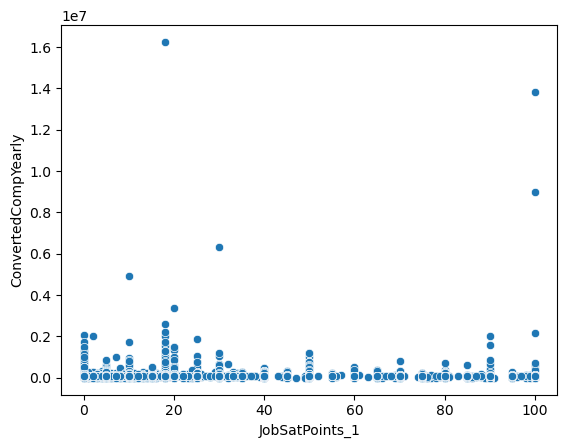

In [319]:
sns.scatterplot(data = data, x = 'JobSatPoints_1', y = 'ConvertedCompYearly')

In [329]:
data.fillna({'SurveyLength':data['SurveyLength'].mode()[0]}, inplace = True)

In [331]:
data['SurveyLength'].unique()

array(['Appropriate in length', 'Too long', 'Too short'], dtype=object)

In [333]:
data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_Normalized,ConvertedCompYearly_Z_Normalized
0,1,I am a developer by profession,<18,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,20,16,10,9,Appropriate in length,Easy,86155,6.0,1.302062e-16,0.0053
1,2,I am a developer by profession,35-44,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0,0,0,0,Appropriate in length,Easy,86155,6.0,1.302062e-16,0.0053
2,3,I am a developer by profession,45-54,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,20,16,10,9,Appropriate in length,Easy,86155,6.0,1.302062e-16,0.0053
3,4,I am learning to code,18-24,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,20,16,10,9,Too long,Easy,86155,6.0,1.302062e-16,0.0053
4,5,I am a developer by profession,18-24,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,20,16,10,9,Too short,Easy,86155,6.0,1.302062e-16,0.0053


<Axes: xlabel='Age', ylabel='JobSatPoints_5'>

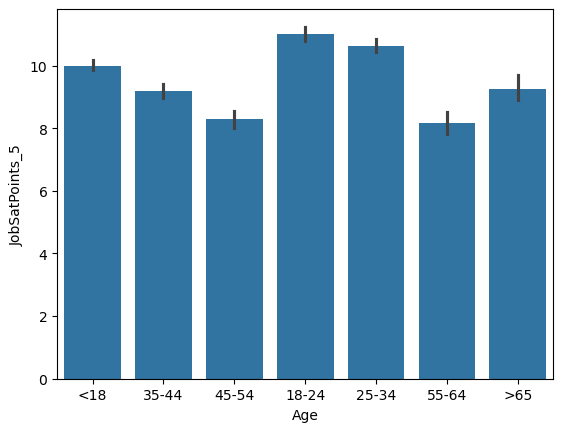

In [335]:
sns.barplot(data = data, x = 'Age', y = 'JobSatPoints_5')

<Axes: xlabel='Age', ylabel='JobSatPoints_6'>

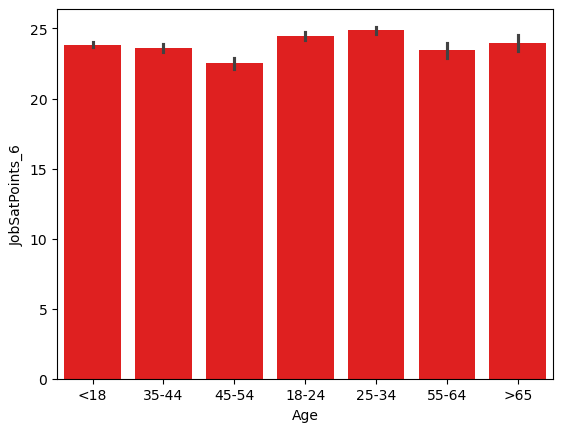

In [336]:
sns.barplot(data = data, x = 'Age', y = 'JobSatPoints_6', color = 'r')

In [339]:
data['Age'].unique()

array(['<18', '35-44', '45-54', '18-24', '25-34', '55-64', '>65'],
      dtype=object)

In [341]:
df = data[data['Age'] == '25-34']

In [343]:
df = data.groupby(by = 'Age')['JobSat'].mean()

In [345]:
df

Age
18-24    6.215704
25-34    6.457847
35-44    6.544438
45-54    6.539446
55-64    6.497087
<18      6.033879
>65      6.291451
Name: JobSat, dtype: float64

<Axes: xlabel='Age'>

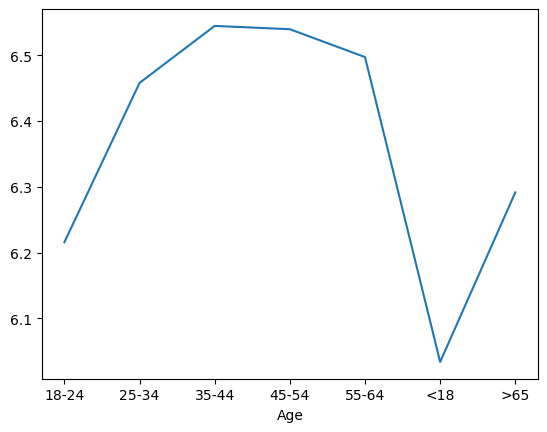

In [347]:
sns.lineplot(x = df.index, y = df.values)

In [349]:
id_vars = data.columns.difference(['JobSatPoints_8', 'JobSatPoints_9']).tolist()

In [351]:
data_melted = data.melt(id_vars = id_vars, var_name = 'JobSatPoints', value_name = 'points')

<Axes: xlabel='Age', ylabel='points'>

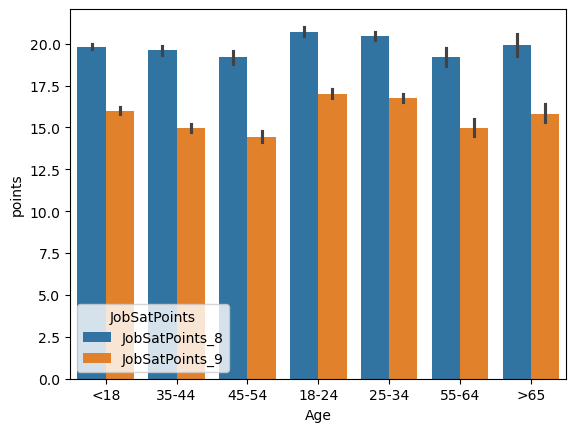

In [352]:
sns.barplot(data = data_melted, x = 'Age', y = 'points', hue = 'JobSatPoints')

In [355]:
data['ConvertedCompYearly'].unique()

array([ 86155,   7322,  30074, ...,  15637,   9711, 116844])

In [357]:
df = data.groupby(by = 'Age')['ConvertedCompYearly'].mean()

In [359]:
df

Age
18-24     75383.229252
25-34     83167.073247
35-44     93784.307522
45-54     97630.231877
55-64    100804.376311
<18       84488.684190
>65       92793.216321
Name: ConvertedCompYearly, dtype: float64

<Axes: xlabel='Age'>

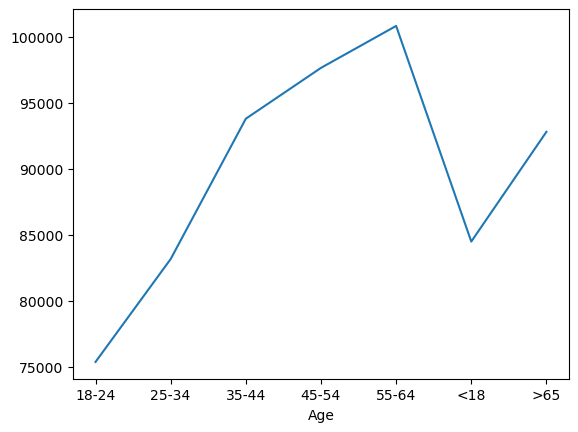

In [361]:
sns.lineplot(x = df.index, y = df.values)

In [362]:
data.select_dtypes('int').columns

Index(['ResponseId', 'CompTotal', 'JobSatPoints_1', 'JobSatPoints_4',
       'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8',
       'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11',
       'ConvertedCompYearly'],
      dtype='object')

In [365]:
df = data.groupby(by = 'RemoteWork')['JobSatPoints_8'].mean().astype('int')

In [367]:
df

RemoteWork
Hybrid (some remote, some in-person)    19
In-person                               20
Remote                                  19
Name: JobSatPoints_8, dtype: int32

<Axes: xlabel='RemoteWork'>

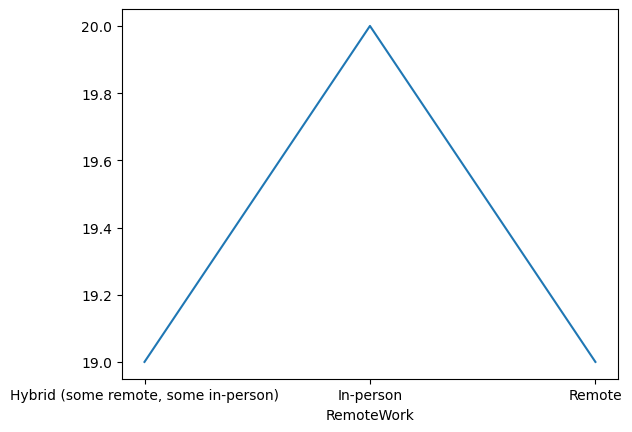

In [369]:
sns.lineplot(x = df.index, y = df.values)

In [371]:
data['WorkExp'] = data['WorkExp'].fillna(value = data['WorkExp'].mean().astype('int'))

In [373]:
data['WorkExp'].isnull().sum()

0

In [375]:
data['WorkExp'] = data['WorkExp'].astype('int')

<Axes: xlabel='WorkExp', ylabel='ConvertedCompYearly'>

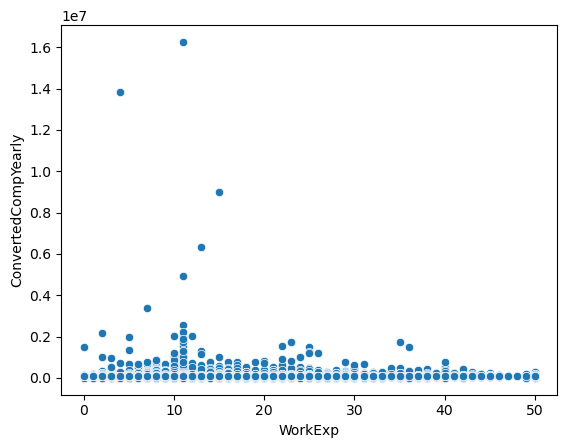

In [377]:
sns.scatterplot(data = data, x = 'WorkExp', y = 'ConvertedCompYearly')

<Axes: xlabel='WorkExp', ylabel='ConvertedCompYearly'>

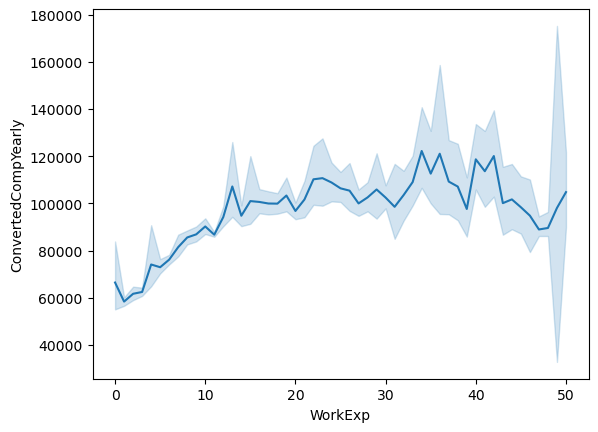

In [379]:
sns.lineplot(data = data, x = 'WorkExp', y = 'ConvertedCompYearly')

<Axes: xlabel='ConvertedCompYearly_Normalized', ylabel='Count'>

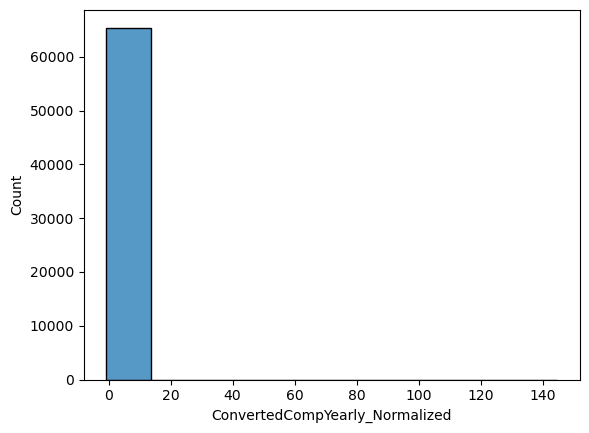

In [381]:
sns.histplot(data = data, x = 'ConvertedCompYearly_Normalized', bins = 10)

In [383]:
data['MainBranch'].unique()

array(['I am a developer by profession', 'I am learning to code',
       'I code primarily as a hobby',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

In [385]:
main_branch_counts = data['MainBranch'].value_counts()

In [387]:
main_branch_counts

MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64

<Axes: ylabel='MainBranch'>

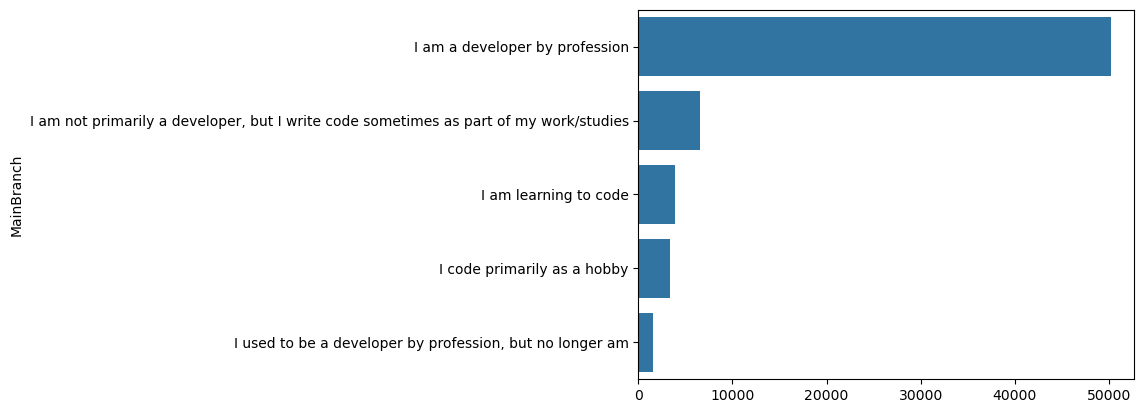

In [389]:
sns.barplot(x = main_branch_counts.values, y = main_branch_counts.index)

In [391]:
data['LanguageWantToWorkWith']

0                                                   Python
1        Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                       C#
3        HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...
4                       C++;HTML/CSS;JavaScript;Lua;Python
                               ...                        
65432                                               Python
65433                                               Python
65434                                               Python
65435                                             Rust;SQL
65436                         JavaScript;Python;TypeScript
Name: LanguageWantToWorkWith, Length: 65437, dtype: object

In [393]:
language_counts = data['LanguageWantToWorkWith'].value_counts().head(5)

<Axes: xlabel='LanguageWantToWorkWith'>

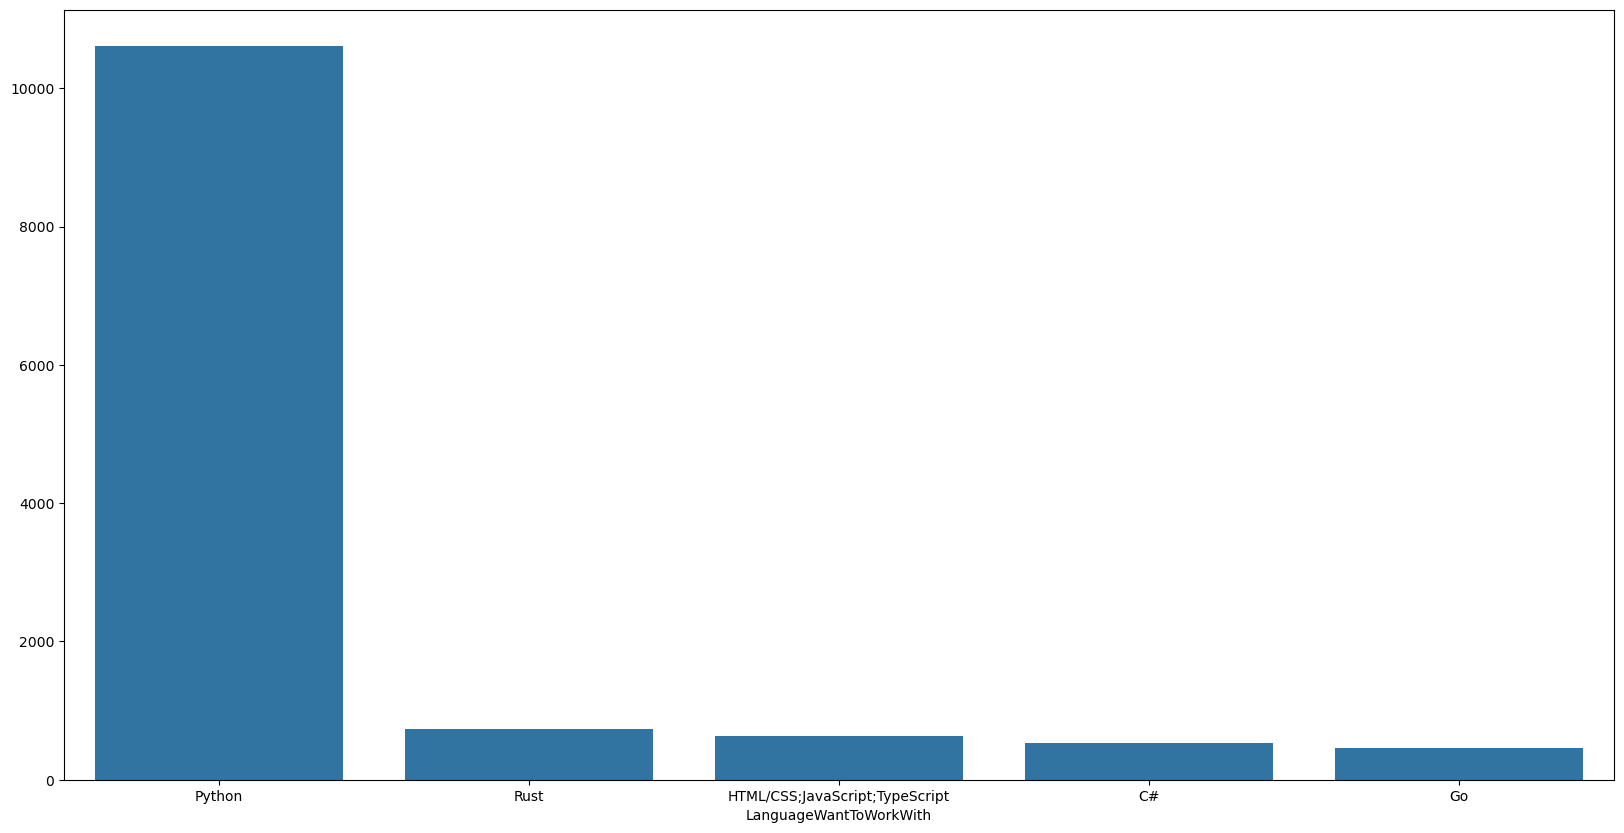

In [395]:
plt.figure(figsize = (20, 10))
sns.barplot(x = language_counts.index, y = language_counts.values)

In [396]:
id_vars = data.columns.difference(['JobSatPoints_6', 'JobSatPoints_7']).tolist()

In [399]:
data_melted = data.melt(id_vars = id_vars, var_name = 'JobSatPoints', value_name = 'points')

<Axes: xlabel='Age', ylabel='points'>

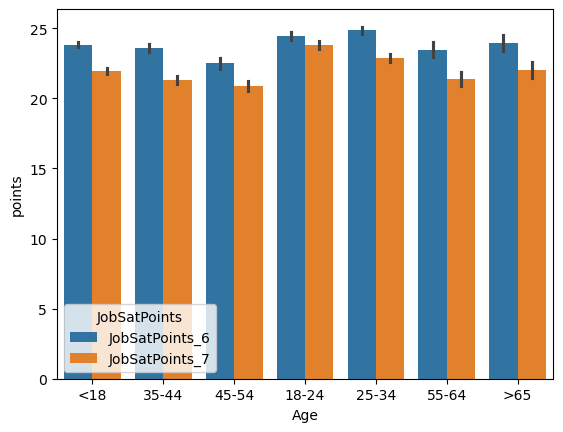

In [401]:
sns.barplot(data = data_melted, x = 'Age', y = 'points', hue = 'JobSatPoints')

In [402]:
d = data['DatabaseHaveWorkedWith'].value_counts().head(5)

<Axes: xlabel='DatabaseHaveWorkedWith'>

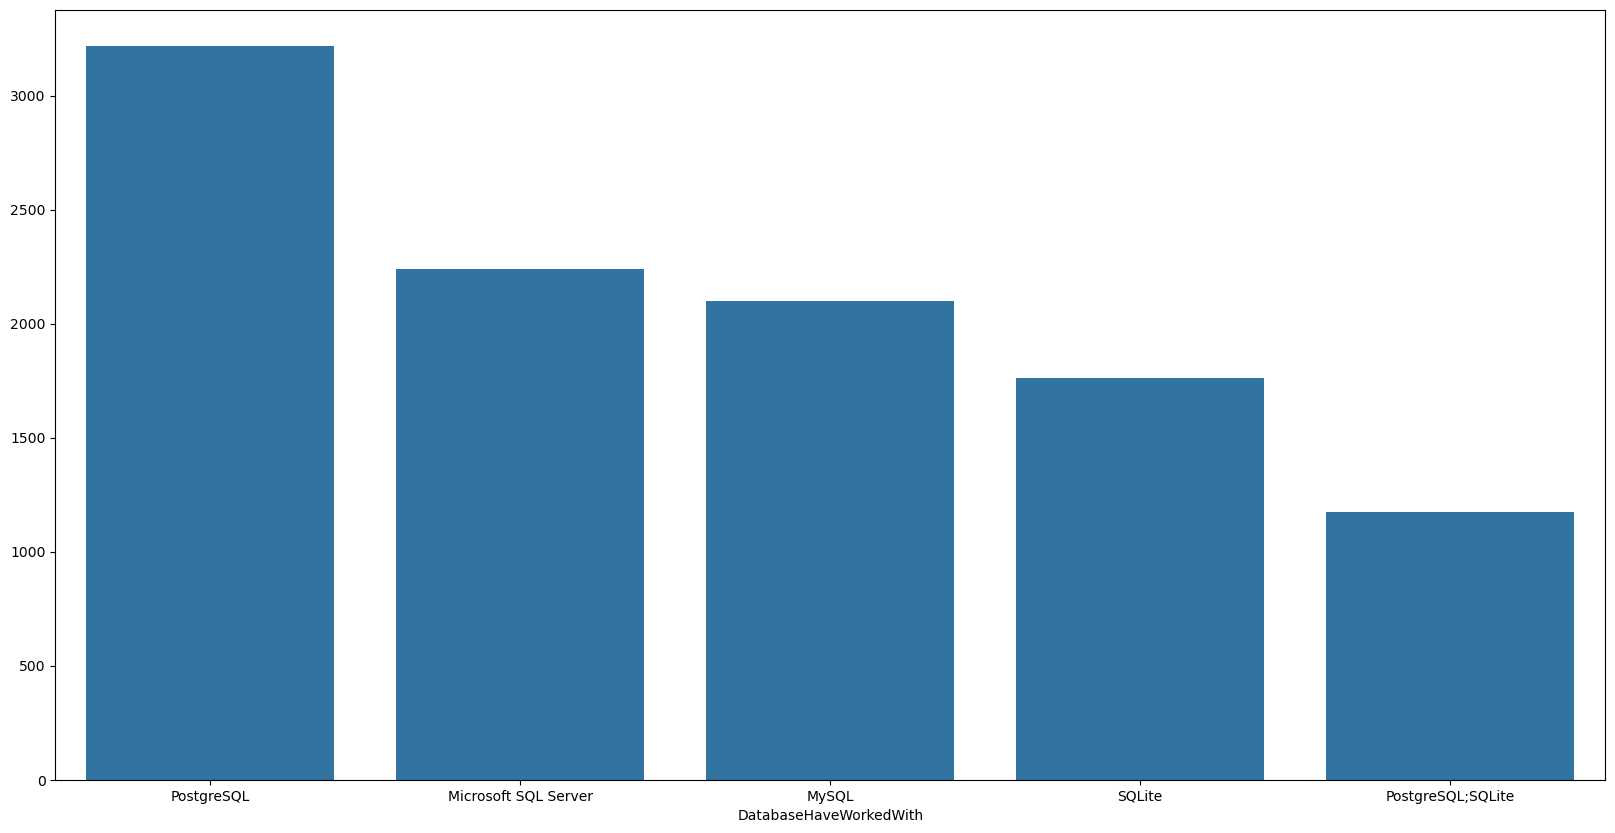

In [403]:
plt.figure(figsize = (20, 10))
sns.barplot(x = d.index, y = d.values)

In [406]:
df = data.groupby(by = 'Age')['ConvertedCompYearly'].median()

<Axes: ylabel='Age'>

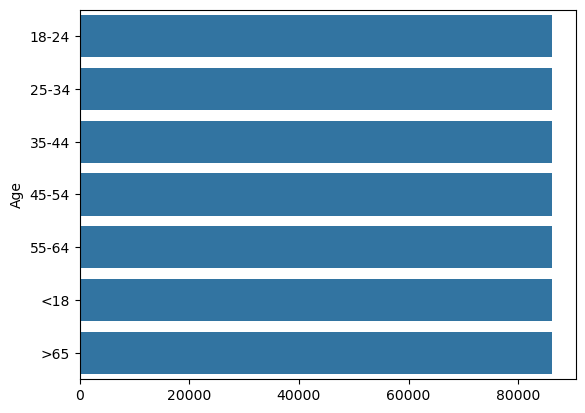

In [408]:
sns.barplot(x = df.values, y = df.index)

In [413]:
data.replace({'Country':{'Unknown':data['Country'].mode()[0]}})

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_Normalized,ConvertedCompYearly_Z_Normalized
0,1,I am a developer by profession,<18,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,20,16,10,9,Appropriate in length,Easy,86155,6.0,1.302062e-16,0.0053
1,2,I am a developer by profession,35-44,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0,0,0,0,Appropriate in length,Easy,86155,6.0,1.302062e-16,0.0053
2,3,I am a developer by profession,45-54,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,20,16,10,9,Appropriate in length,Easy,86155,6.0,1.302062e-16,0.0053
3,4,I am learning to code,18-24,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,20,16,10,9,Too long,Easy,86155,6.0,1.302062e-16,0.0053
4,5,I am a developer by profession,18-24,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,20,16,10,9,Too short,Easy,86155,6.0,1.302062e-16,0.0053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,20,16,10,9,Appropriate in length,Easy,86155,6.0,1.302062e-16,0.0053
65433,65434,I am a developer by profession,25-34,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,...,20,16,10,9,Appropriate in length,Easy,86155,6.0,1.302062e-16,0.0053
65434,65435,I am a developer by profession,25-34,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,20,16,10,9,Appropriate in length,Easy,86155,6.0,1.302062e-16,0.0053
65435,65436,I am a developer by profession,18-24,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0,0,0,0,Appropriate in length,Easy,86155,6.0,1.302062e-16,0.0053


In [415]:
data['Country'].unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines',
       'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy',
       'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria',
       'Iran, Islamic Republic of...', 'France', 'Saudi Arabia',
       'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands',
       'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia',
       'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecu

In [417]:
d = data['Country'].value_counts().head(3)

<Axes: xlabel='Country'>

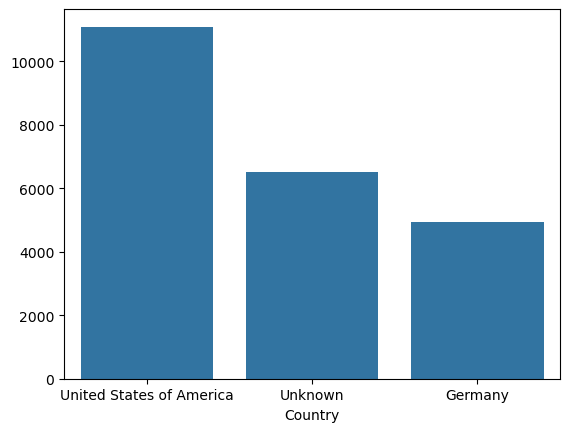

In [419]:
sns.barplot(x = d.index, y = d.values)

In [421]:
df = data.groupby(by = 'Age')[['JobSatPoints_6', 'JobSatPoints_7']].mean()

In [423]:
df

,JobSatPoints_6,JobSatPoints_7
Age,,
18-24,24.460846,23.820187
25-34,24.855858,22.882103
35-44,23.607014,21.334293
45-54,22.500240,20.888302
55-64,23.450874,21.366214
<18,23.823988,21.957555
>65,23.968912,22.022021


<Axes: xlabel='Age'>

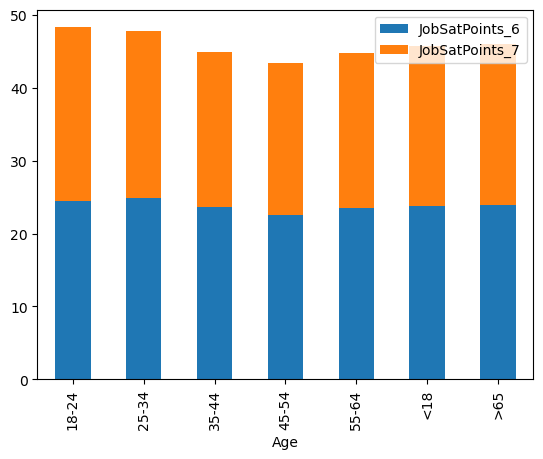

In [425]:
df.plot(kind = 'bar', stacked = True)